# **Final Project**

### **Group 9-DNSC 6305/ISTM 4212 Fall 2024 Due date: Dec 15, 2024**

#### **Introduction & Ask 1**
**Dataset Overview:**
  - The dataset represents a comprehensive record of bank transactions, including customer demographics, financial information, and transaction details. 
  - It consists of 1,048,567 million rows, each representing a unique transaction.
  - It has 9 columns, providing information about customer demographics, account status, and transaction details.

**Source of the Dataset:**
  - This dataset originates from the **Bank Customer Segmentation dataset** by Shivam Bansal on Kaggle. He is a data scientist and popular github contributor. 

**Business Use:**
  - Banks and financial institutions can use this data to segment customers into different groups based on their account balances, transaction patterns, and demographics.
  - This helps tailor products and services to specific customer needs, providing insights into customer preferences.
  - It is ideal for clustering, classification, and regression tasks, making it a great resource for data scientists and machine learning enthusiasts.

**Initial Exploration:**
  - We will acquire the data and perform initial exploration to ensure it is suitable for dimensional modeling and analytical analysis.
    
**Three Major Analytical Questions:**
  1. **Based on customer gender and age group, what are the total and average account balances, and how many customers fall into each group?**
     - This helps design personalized marketing campaigns, prioritize high-value clients, and re-engage latent customers.
     - It will also help understand customer behavior to personalize banking services.
  2. **What are the total account balances and the number of customers in each location, and which locations have the highest total account balances?**
     - The analysis will reveal low-value and high-value locations to understand the specific revenue contributions.
     - It provides actionable insights for developing retention strategies and evaluates branch or regional performance based on total deposits (total account balances) and customer base size. 
  3. **What are the total transaction amounts and the number of transactions for each hour of the day, and during which hours do customers make the highest total transactions?**
     - This helps the bank to understand ATM or digital banking transaction patterns for better service availability planning..
     - It will increase customer satisfaction by offering relevant products, reducing operational costs by scaling down resources during low-activity hours, and improve bank profitability.

**Concerns:**
  1. **Missing data** can lead to incomplete analysis or inaccurate results. We will impute missing values through preprocessing of the data by importing the most popular value. 
  3. **Transaction timestamps** were separated into different columns, we will combine them to make processing easier for keys. 
  4. **Inaccurate or inconsistent data**, such as invalid dates, transaction times, or negative transaction amounts. We will validate and clean the data to fix these accounts where the customer was born in 1800, or the transaction occured in 2027. 


#### **ASK 2 - Clean & Format Data**

**Before we begin, we will use the`!pwd` command to display the current working directory in the terminal or shell**

In [1]:
!pwd

/home/ubuntu


**We run this code to make sure `ipython-sql` and `psycopg2` libraries are installed so that we can use PostgreSQL.**

In [2]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

psycopg2==2.9.9
types-psycopg2==2.9


**Dropping DB named SECDB (using PostgreSQL's dropdp command) if it already exists to ensure that this notebook can be run repeatedly.**

In [3]:
!dropdb -U postgres finalproject

**Using PostgreSQL's createdb command to create a database named SECDB**

In [4]:
!createdb -U postgres finalproject

**We aim to leverage the query capabilities provided by SQL. To accomplish this, we are installing the SQL extension to enable SQL execution within this notebook.**

In [5]:
%load_ext sql

**This command connects to the finalproject database using the postgres user, allowing us to run SQL queries directly within the notebook.**

In [6]:
%sql postgresql://postgres@/finalproject

Connecting to 'postgresql://postgres@/finalproject'

**Since Kaggle datasets are hosted on private domains and cannot be downloaded directly using commands like !wget, we are using the pandas library to load the `bank_transactions.csv` file, which was manually downloaded from Kaggle**

In [7]:
import pandas as pd
bank = pd.read_csv("bank_transactions.csv")

**This command renames the file `bank_transactions.csv` to `bank.csv` in the current directory using the `!mv` (move) command.**


In [8]:
!mv bank_transactions.csv bank.csv

**This command counts the number of lines in the `bank.csv` file using the `wc -l` (word count with line count) command.**


In [9]:
!wc -l bank.csv

82822 bank.csv


**To list the column names of the `bank.csv` file, the `csvcut -n` command is used.**

In [10]:
!csvcut -n bank.csv

  1: TransactionID
  2: CustomerID
  3: CustomerDOB
  4: CustGender
  5: CustLocation
  6: CustAccountBalance
  7: TransactionDate
  8: TransactionTime
  9: TransactionAmount (INR)


**The `csvclean` command is used to clean the `bank.csv` file by fixing any malformed CSV issues, such as improper quoting or extra delimiters.**


In [11]:
!csvclean bank.csv

No errors.


**Currently, there are no formatting errors; however, we will conduct checks for null values and other data integrity issues at a later stage.**


## Table Creation 

**Before we begin creating our table, it is essential to first understand the data. Therefore, we will use the following command to display basic statistics of the `bank.csv` file using `!csvstat`. This will assist in analyzing the structure and data types of the columns.**

In [12]:
!head -n 10000 bank.csv | csvstat

  1. "TransactionID"

	Type of data:          Text
	Contains null values:  False
	Non-null values:       9999
	Unique values:         9999
	Longest value:         5 characters
	Most common values:    T1 (1x)
	                       T2 (1x)
	                       T3 (1x)
	                       T4 (1x)
	                       T5 (1x)

  2. "CustomerID"

	Type of data:          Text
	Contains null values:  False
	Non-null values:       9999
	Unique values:         9977
	Longest value:         8 characters
	Most common values:    C4138629 (2x)
	                       C8625213 (2x)
	                       C8835033 (2x)
	                       C8041946 (2x)
	                       C6727588 (2x)

  3. "CustomerDOB"

	Type of data:          Text
	Contains null values:  False
	Non-null values:       9999
	Unique values:         5337
	Longest value:         8 characters
	Most common values:    1/1/1800 (629x)
	                       nan (34x)
	                       1/1/92 (9x)
	              

**The following SQL code first drops the banktransactions table if it exists, and then creates a new banktransactions table with columns for transaction details and customer information.**

In [13]:
%%sql
DROP TABLE IF EXISTS banktransactions;

CREATE TABLE banktransactions (
    TransactionID VARCHAR(9) NOT NULL,
    CustomerID VARCHAR(9) NOT NULL,
    CustomerDOB DATE NULL,
    CustGender VARCHAR(2) NULL, 
    CustLocation VARCHAR(36) NULL,
    CustAccountBalance NUMERIC NULL,
    TransactionDate VARCHAR(15) NOT NULL,
    TransactionTime TIME NOT NULL,
    TransactionAmount NUMERIC NOT NULL
)

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**The `!pwd` command is used to display the current working directory in the terminal or shell, showing the path of the folder you are currently in.**


In [14]:
!pwd

/home/ubuntu


**The following command grants read permissions to the group, others, and the owner for the `bank.csv` file located in the `/home/ubuntu/` directory.**


In [15]:
!chmod guo+r bank.csv

**Executing this will display the first few lines of the `bank.csv` file, offering a quick glance at its content and structure.**

In [16]:
!head bank.csv

TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25
T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999
T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459
T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060
T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
T6,C1536588,8/10/72,F,ITANAGAR,53609.2,2/8/16,173940,676
T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566
T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148
T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833


**Now, we will insert data into the `banktransactions` table from the `bank.csv` file**

In [17]:
%%sql
COPY BankTransactions FROM '/home/ubuntu/bank.csv'
CSV
HEADER;

Running query in 'postgresql://postgres@/finalproject'

RuntimeError: (psycopg2.errors.DatetimeFieldOverflow) date/time field value out of range: "26/11/96"
HINT:  Perhaps you need a different "datestyle" setting.
CONTEXT:  COPY banktransactions, line 4, column customerdob: "26/11/96"

[SQL: COPY BankTransactions FROM '/home/ubuntu/bank.csv'
CSV
HEADER;]
(Background on this error at: https://sqlalche.me/e/20/9h9h)
If you need help solving this issue, send us a message: https://ploomber.io/community


**The above runtime error is occuring because the coloumn 'TransactionTime" in the csv file comtains values such as 884706.0. But since decimals are compatilble with PostgreSQL's datatype for time. It is required that time is in the format of HH:MI:SS. Which is why we will be converting 'transactiontime' values from a numeric format to the 'TIME' format (HH:MI:SS)**

## **The runtime error has been fixed in the following cell**

In [18]:
import pandas as pd

csv_path = "/home/ubuntu/bank.csv"
df = pd.read_csv(csv_path)
def convert_to_time(value):
    try:
        value = int(float(value))  # Ensure it's an integer
        hours = value // 10000
        minutes = (value % 10000) // 100
        seconds = value % 100
        return f"{hours:02}:{minutes:02}:{seconds:02}"
    except (ValueError, TypeError):
        return None  
df['TransactionTime'] = df['TransactionTime'].apply(convert_to_time)
cleaned_csv_path = "/home/ubuntu/bank_cleaned.csv"
df.to_csv(cleaned_csv_path, index=False)
print("TransactionTime column cleaned successfully. Cleaned CSV saved!")


TransactionTime column cleaned successfully. Cleaned CSV saved!


In [20]:
%%sql
SET datestyle = 'DMY';

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

In [21]:
%%sql 
COPY BankTransactions
FROM '/home/ubuntu/bank_cleaned.csv'
DELIMITER ','
CSV HEADER;

Running query in 'postgresql://postgres@/finalproject'

82822 rows affected.

++
||
++
++

In [22]:
%%sql 
SELECT COUNT(*) FROM BankTransactions;
SELECT * FROM BankTransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,14:32:07,25.0
T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,14:18:58,27999.0
T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,14:27:12,459.0
T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,14:27:14,2060.0
T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,18:11:56,1762.5
T6,C1536588,1972-10-08,F,ITANAGAR,53609.2,2/8/16,17:39:40,676.0
T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,17:38:06,566.0
T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,17:05:37,148.0
T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,19:28:25,833.0
T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,19:24:46,289.11


**Now, we verify that all the data from the CSV file has been correctly populated into the `banktransactions` table and compare it with the previous output of `!wc -l` to ensure the row count matches.**


In [23]:
%%sql
SELECT COUNT(*) FROM BankTransactions;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

count
82822


**Now that the data has been verified, we will take a look at the first 10 rows of the `banktransactions` table.**

In [24]:
%%sql
SELECT * FROM banktransactions
LIMIT 10

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,14:32:07,25.0
T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,14:18:58,27999.0
T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,14:27:12,459.0
T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,14:27:14,2060.0
T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,18:11:56,1762.5
T6,C1536588,1972-10-08,F,ITANAGAR,53609.2,2/8/16,17:39:40,676.0
T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,17:38:06,566.0
T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,17:05:37,148.0
T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,19:28:25,833.0
T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,19:24:46,289.11


## Star Schema Diagram

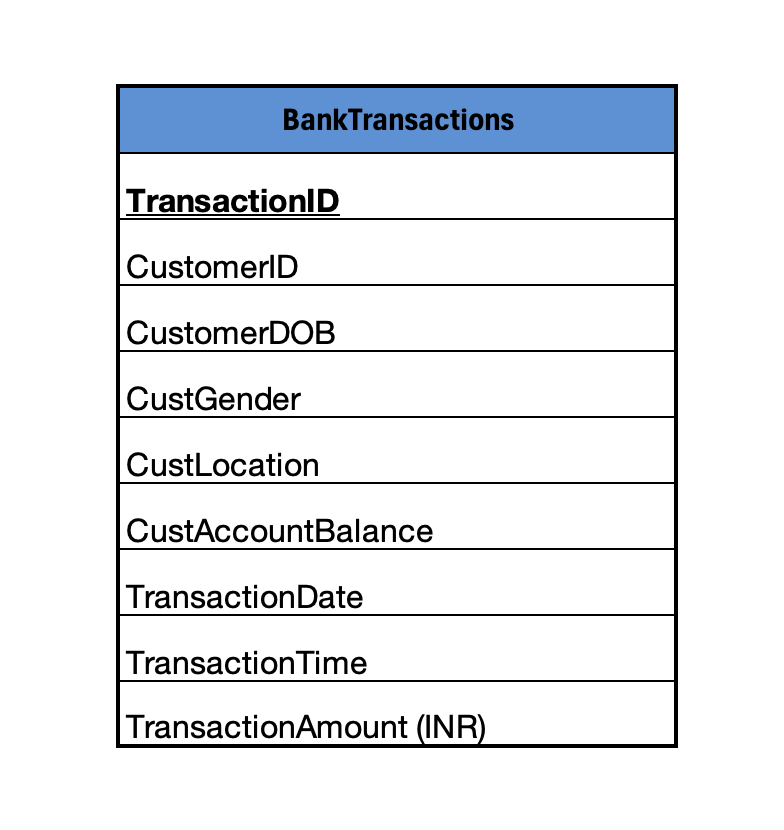

In [119]:
from IPython.display import Image
Image(filename="/home/ubuntu/BankTransactions.png")

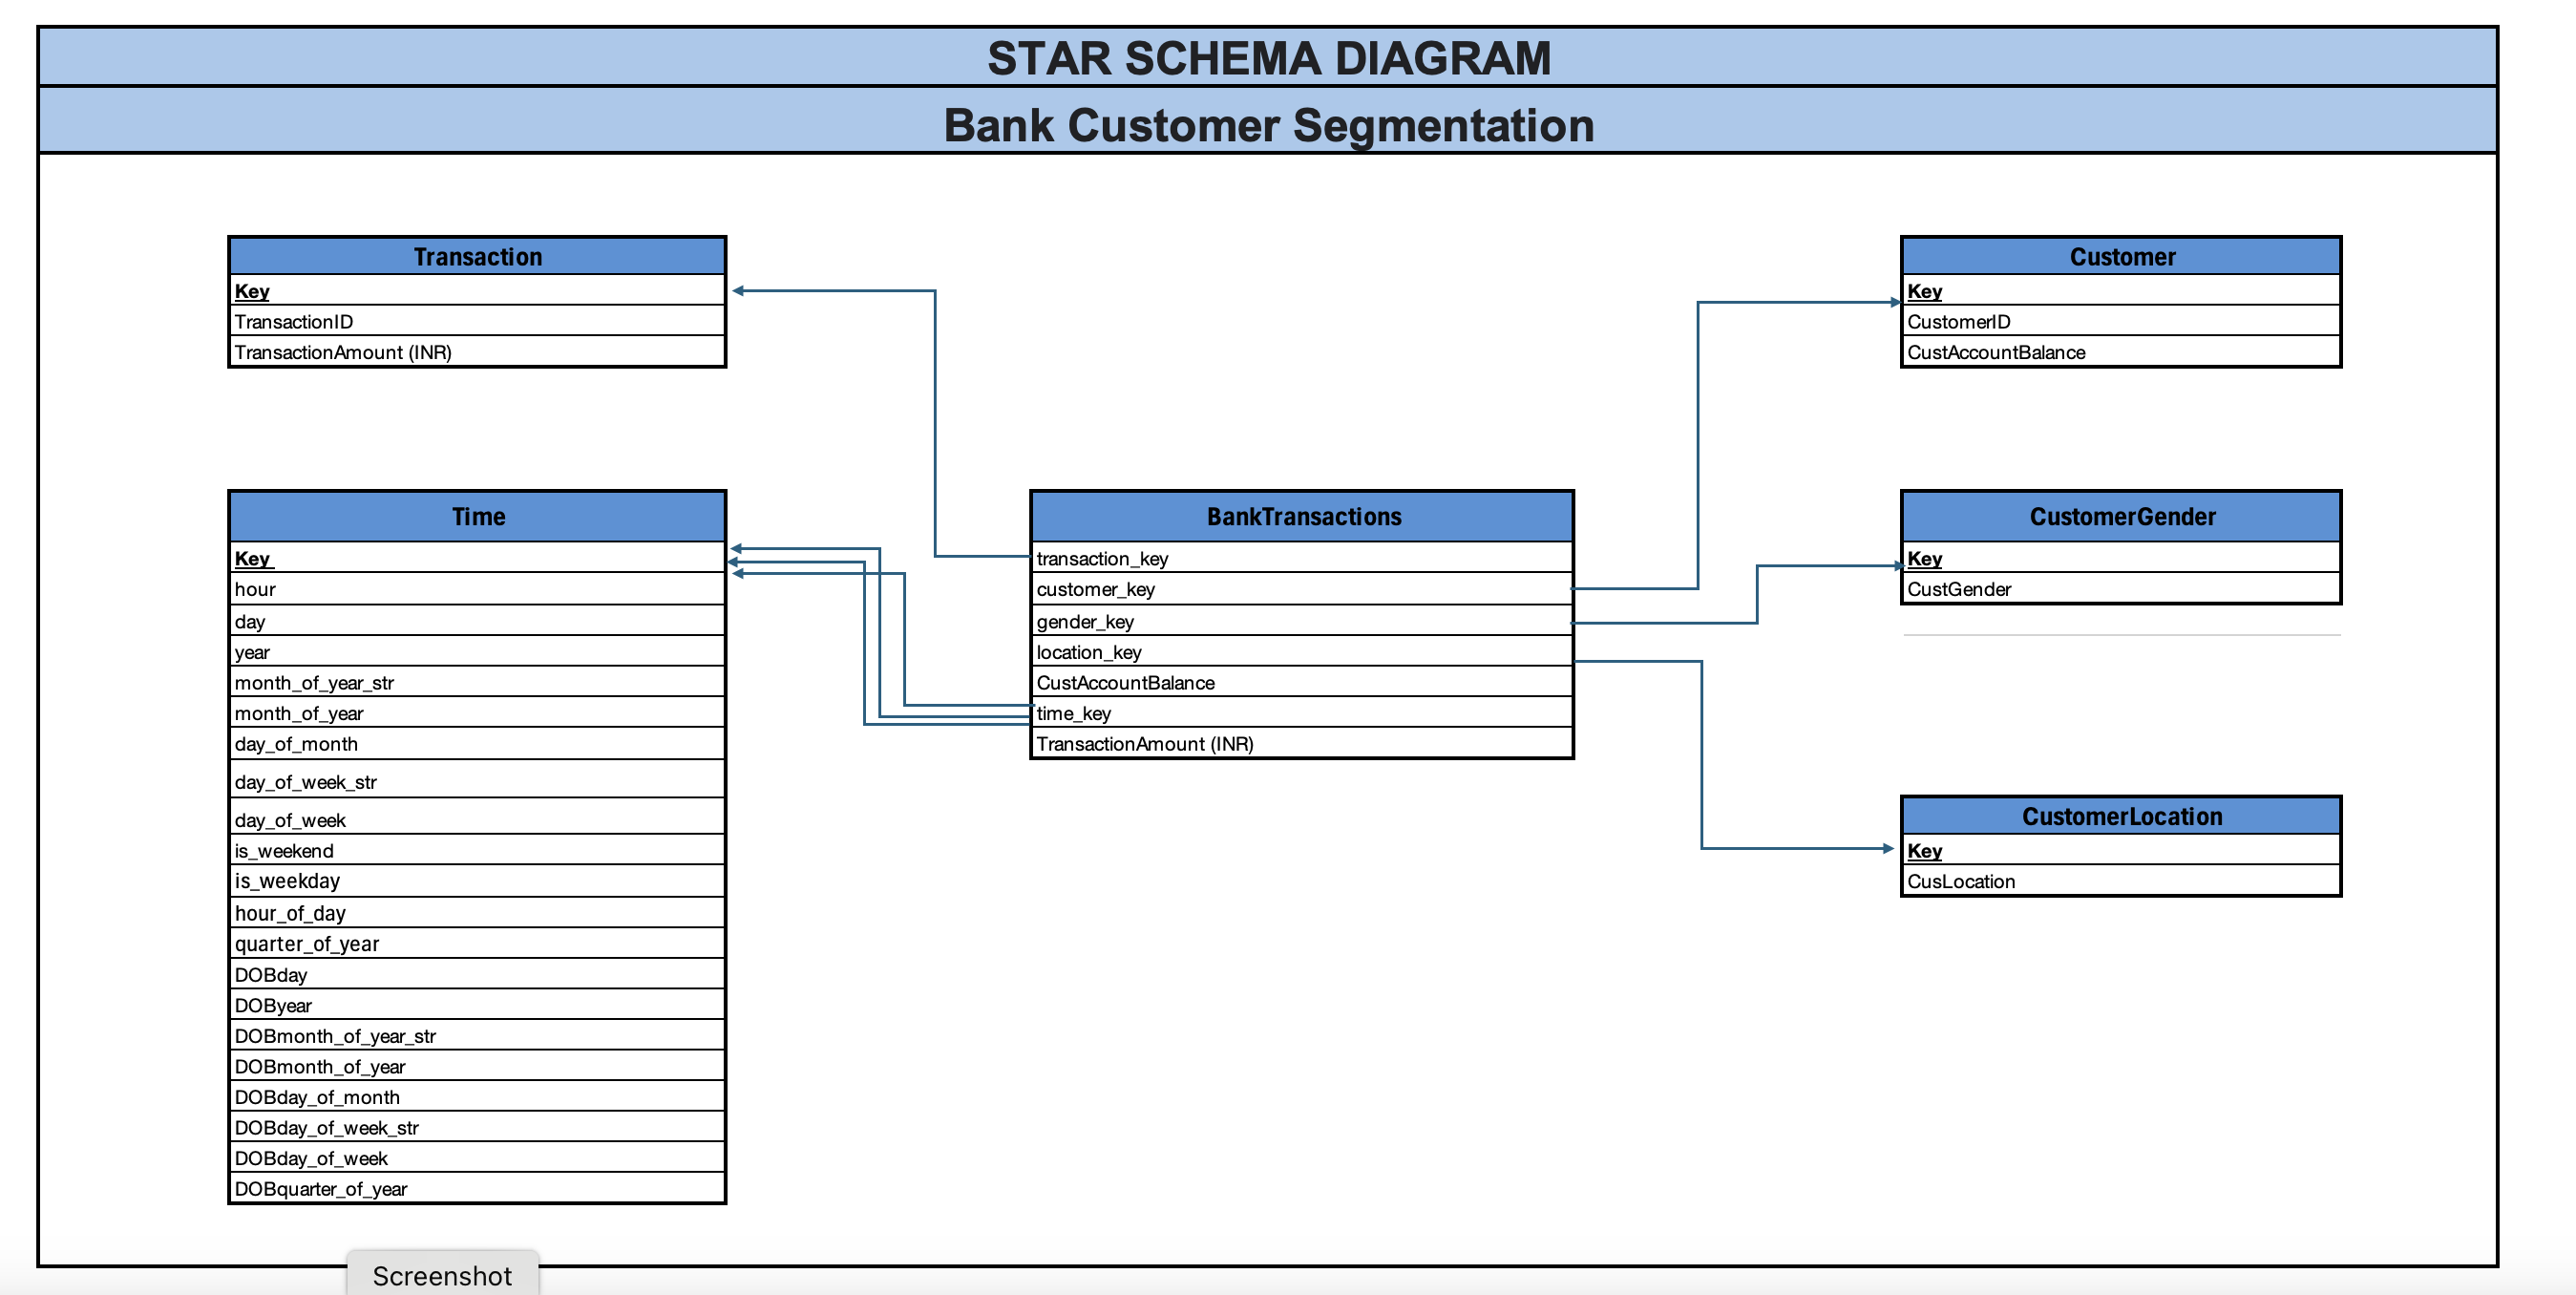

In [120]:
from IPython.display import Image
Image(filename="/home/ubuntu/Star Schema Diagram.png")

## Transforming Data for analysis

#### **CustomerDOB**

**We will first run this code to figure out how many rows have NULL values in the `CustomerDOB` column**

In [25]:
%%sql
SELECT COUNT(*) AS NullCount
FROM BankTransactions
WHERE CustomerDOB IS NULL;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

nullcount
320


**Since the `CustomerDOB` column contains null values, we will begin by identifying the most common birthday in the dataset 
to help guide us in handling the missing values.**

In [26]:
%%sql 
SELECT CustomerDOB, COUNT(*) AS Mode
FROM banktransactions
WHERE CustomerDOB IS NOT NULL
GROUP BY CustomerDOB
HAVING COUNT(*) >= ALL (
    SELECT COUNT(*)
    FROM banktransactions
    WHERE CustomerDOB IS NOT NULL
    GROUP BY CustomerDOB
);

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

customerdob,mode
1800-01-01,4955


**Now that we know the most common birthdate is `1989-01-01`, we will update the `banktransactions` table by replacing any NULL values in the `customerdob` column with this date.**


In [27]:
%%sql
UPDATE banktransactions
SET customerdob = '1989-01-01'
WHERE customerdob is NULL

Running query in 'postgresql://postgres@/finalproject'

320 rows affected.

++
||
++
++

**We run this query to ensure that there are no years greater than 2024 in the `customerdob` data column.**


In [28]:
%%sql
SELECT EXTRACT(YEAR FROM customerdob) AS year, COUNT(*) AS count
FROM banktransactions
GROUP BY year
ORDER BY year DESC
LIMIT 1;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

year,count
2069,446


**We run this query to identify the earliest year in the `customerdob` data, ensuring there are no years earlier than expected.**

In [29]:
%%sql
SELECT EXTRACT(YEAR FROM customerdob) AS year, COUNT(*) AS count
FROM banktransactions
GROUP BY year
ORDER BY year ASC
LIMIT 1;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

year,count
1800,4955


#### **Customer Gender**

**We will first run this code to figure out how many rows have NULL values in the `CustGender` column**

In [30]:
%%sql
SELECT COUNT(*) AS NullCount
FROM banktransactions
WHERE CustGender IS NULL;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

nullcount
74


**Since the `custgender` column contains null values, we first run this query to find the most common gender in the dataset.**

In [31]:
%%sql
UPDATE banktransactions
SET CustGender = NULL
WHERE CustGender = 'T';

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**Upon inspecting the data, we realized that there was one `custgender` value of 'T'. Therefore, we will update the `custgender` column by setting this value to NULL.**


In [32]:
%%sql 
SELECT custgender, Count(*) AS MODE
FROM banktransactions
GROUP BY custgender
HAVING Count(*) >= ALL
   (SELECT Count(*)
   FROM banktransactions
   GROUP BY custgender);

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

custgender,mode
M,60120


**Now that we have identified `Male` as the most common gender, we will replace all null values in the `custgender` column with 'M' to standardize the data.**


In [33]:
%%sql
UPDATE banktransactions
SET custgender = 'M'
WHERE custgender IS NULL;

Running query in 'postgresql://postgres@/finalproject'

74 rows affected.

++
||
++
++

#### **Customer Location**

**We will first run this code to figure out how many rows have NULL values in the `CustLocation` column**

In [34]:
%%sql
SELECT COUNT(*) AS NullCount
FROM banktransactions
WHERE custlocation IS NULL;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

nullcount
13


**This SQL query identifies the most common `custlocation` in the `banktransactions` table by counting the occurrences of each location and comparing them to find the mode (most frequent value). We are doing this to determine the most common location, so we can use it to replace the null values in the `custlocation` column.**


In [35]:
%%sql
SELECT custlocation, COUNT(*) AS mode
FROM banktransactions
GROUP BY custlocation
HAVING COUNT(*) >= ALL
   (SELECT COUNT(*)
   FROM banktransactions
   GROUP BY custlocation);

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

custlocation,mode
MUMBAI,8215


**Now that we have identified `MUMBAI` as the most common customer location, we can replace the null values in the `custlocation` column with this value.**


In [36]:
%%sql
UPDATE banktransactions
SET custlocation = 'MUMBAI'
WHERE custlocation IS NULL;

Running query in 'postgresql://postgres@/finalproject'

13 rows affected.

++
||
++
++

#### **Customer Account Balance**

**We will first run this code to figure out how many rows have NULL values in the `CustAccountBalance` column**

In [37]:
%%sql
SELECT COUNT(*) AS NullCount
FROM banktransactions
WHERE custaccountbalance IS NULL;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

nullcount
188


**The goal of this SQL script is to replace NULL values in the custaccountbalance column of the banktransactions table with the average (mean) value of all non-NULL entries in the same column. This ensures no NULL values exist while maintaining consistency by filling them with a statistically representative value.**


In [38]:
%%sql
UPDATE banktransactions
SET custaccountbalance = (
    SELECT AVG(custaccountbalance)
    FROM banktransactions
    WHERE custaccountbalance IS NOT NULL
)
WHERE custaccountbalance IS NULL;

Running query in 'postgresql://postgres@/finalproject'

188 rows affected.

++
||
++
++

#### **Transaction Time and Transaction Date**

**We will first run the following codesto figure out how many rows have NULL values in the `TransactionTime` and `TransactionDate` column**

In [39]:
%%sql
SELECT COUNT(*) AS NullCount
FROM banktransactions
WHERE TransactionTime IS NULL;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

nullcount
0


In [40]:
%%sql
SELECT COUNT(*) AS NullCount
FROM banktransactions
WHERE TransactionDate IS NULL;

Running query in 'postgresql://postgres@/finalproject'

1 rows affected.

nullcount
0


**Since there are no NULL values in the `transactiontime` and `transactiondate` columns, we can proceed to populate the new `Transaction_Time` column. This step is necessary in order to concatenate the `transaction_time` and `transaction_date` columns for further analysis.**


In [41]:
%%sql
ALTER TABLE banktransactions
ADD COLUMN Transaction_Time TIMESTAMP;

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**Now, we will concatenate the `TransactionDate` and `TransactionTime` columns into the new `Transaction_Time` column, converting the result into a `TIMESTAMP` format for proper time-based analysis.**


In [42]:
%%sql
UPDATE banktransactions
SET Transaction_Time = TO_TIMESTAMP(
    TO_DATE(TransactionDate, 'DD/MM/YY') || ' ' || LPAD(TransactionTime::text, 6, '0'),
    'YYYY-MM-DD HH24:MI:SS'
);

Running query in 'postgresql://postgres@/finalproject'

82822 rows affected.

++
||
++
++

**We run this query to verify that the `TransactionDate` and `TransactionTime` columns have been correctly concatenated into the new `Transaction_Time` column, ensuring the data is formatted properly.**


In [43]:
%%sql
SELECT * FROM banktransactions
LIMIT 10

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,14:32:07,25.0,2016-08-02 14:32:00
T175,C2918640,1989-05-16,M,HISAR,41319.3,12/8/16,12:21:32,825.0,2016-08-12 12:21:00
T1200,C6874988,1994-10-14,M,CHENNAI,4665.3,21/10/16,19:57:07,100.0,2016-10-21 19:57:00
T1457,C8013141,1989-09-13,M,NEW DELHI,155633.09,21/10/16,20:00:15,10.0,2016-10-21 20:00:00
T2052,C6286520,1990-12-06,M,CHANDIGARH,0.0,21/10/16,20:07:59,118.0,2016-10-21 20:07:00
T2478,C1166180,1800-01-01,F,PARWANOO,422.55,21/10/16,21:47:44,1556.58,2016-10-21 21:47:00
T2563,C8029722,1989-07-10,M,CHENNAI,10399.63,21/10/16,20:55:16,542.0,2016-10-21 20:55:00
T2819,C2149459,1978-05-03,F,MUMBAI,93.5,21/10/16,05:35:00,65.0,2016-10-21 05:35:00
T2989,C4613073,1976-09-18,F,DOMBIVALI EAST THANE,42378.91,21/10/16,15:20:41,200.0,2016-10-21 15:20:00
T3076,C1622962,1990-12-25,M,NASHIK,31146.73,21/10/16,21:04:53,176.2,2016-10-21 21:04:00


#### **Checking for duplicates**

**This SQL query finds duplicate transactions in the `banktransactions` table by checking for rows where the combination of `customerid`, `transaction_time`, and `transactionamount` appears more than once.**


In [47]:
%%sql 
SELECT *
FROM banktransactions
WHERE (customerid, transactiontime, transactionamount) IN (
    SELECT customerid, transactiontime, transactionamount
    FROM banktransactions
    GROUP BY customerid, transactiontime, transactionamount
    HAVING COUNT(*) > 1
 );

Running query in 'postgresql://postgres@/finalproject'

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time


**This SQL query retrieves transactions from the `banktransactions` table that have duplicate `transactionid`s. It groups the data by `transactionid` and selects those that appear more than once in the table.**


In [49]:
%%sql
SELECT *
FROM banktransactions
WHERE (transactionid) IN (
    SELECT transactionid
    FROM banktransactions
    GROUP BY transactionid
    HAVING COUNT(*) > 1
); 

Running query in 'postgresql://postgres@/finalproject'

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time


**As we can see, there are no duplicate entries in the data, so we can confidently proceed with the next steps**

## **Generating Time Dimension**

**In this SQL query, we extract various components from the `Transaction_Time` column, such as the year, month, day, day of the week, and time-based attributes. These extracted features can be valuable for analysis, as they allow us to explore patterns and trends across different time periods, which is especially useful in data warehouse models and feature engineering for statistical models.**


In [50]:
%%sql
SELECT DISTINCT 
    Transaction_Time,
    TO_CHAR(Transaction_Time, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(Transaction_Time, 'YYYY-MM-DD') AS day,
    TO_CHAR(Transaction_Time, 'YYYY') AS year,
    TO_CHAR(Transaction_Time, 'Month') AS month_of_year_str,
    TO_CHAR(CAST(Transaction_Time AS DATE), 'MM') AS month_of_year,
    TO_CHAR(CAST(Transaction_Time AS DATE), 'DD') AS day_of_month,
    TO_CHAR(Transaction_Time, 'Day') AS day_of_week_str,
    TO_CHAR(Transaction_Time, 'D') AS day_of_week,
    CASE 
        WHEN CAST(TO_CHAR(Transaction_Time, 'D') AS INTEGER) IN (7, 1)
        THEN 'true'
        ELSE 'false'
    END AS is_weekend,
    CASE 
        WHEN CAST(TO_CHAR(Transaction_Time, 'D') AS INTEGER) NOT IN (7, 1)
        THEN 'true'
        ELSE 'false'
    END AS is_weekday,
    TO_CHAR(Transaction_Time, 'HH24') AS hour_of_day,
    TO_CHAR(Transaction_Time, 'Q') AS quarter_of_year
FROM banktransactions
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transaction_time,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
2016-08-21 11:26:00,2016-08-21 11:00:00,2016-08-21,2016,August,08,21,Sunday,1,true,false,11,3
2016-10-21 22:24:00,2016-10-21 22:00:00,2016-10-21,2016,October,10,21,Friday,6,false,true,22,4
2016-08-03 04:58:00,2016-08-03 04:00:00,2016-08-03,2016,August,08,03,Wednesday,4,false,true,04,3
2016-08-02 03:16:00,2016-08-02 03:00:00,2016-08-02,2016,August,08,02,Tuesday,3,false,true,03,3
2016-09-27 05:04:00,2016-09-27 05:00:00,2016-09-27,2016,September,09,27,Tuesday,3,false,true,05,3
2016-08-03 08:57:00,2016-08-03 08:00:00,2016-08-03,2016,August,08,03,Wednesday,4,false,true,08,3
2016-09-27 15:43:00,2016-09-27 15:00:00,2016-09-27,2016,September,09,27,Tuesday,3,false,true,15,3
2016-09-22 15:46:00,2016-09-22 15:00:00,2016-09-22,2016,September,09,22,Thursday,5,false,true,15,3
2016-09-27 01:09:00,2016-09-27 01:00:00,2016-09-27,2016,September,09,27,Tuesday,3,false,true,01,3
2016-09-30 19:40:00,2016-09-30 19:00:00,2016-09-30,2016,September,09,30,Friday,6,false,true,19,3


**Similarly to `Transaction_Time`, we are extracting various components from the `CustomerDOB` (Date of Birth) column. This includes the year, month, day, day of the week, and time-related features such as whether the date falls on a weekend or weekday.These extracted features help in analyzing patterns or trends based on birthdates, which can be useful for demographic analysis and segmentation in the data model.**


In [51]:
%%sql
SELECT DISTINCT 
    CustomerDOB,
    TO_CHAR(CustomerDOB, 'YYYY-MM-DD') AS DOBday,  
    TO_CHAR(CustomerDOB, 'YYYY') AS DOByear,  
    TO_CHAR(CustomerDOB, 'Month') AS DOBmonth_of_year_str,  
    TO_CHAR(CustomerDOB, 'MM') AS DOBmonth_of_year, 
    TO_CHAR(CustomerDOB, 'DD') AS DOBday_of_month,  
    TO_CHAR(CustomerDOB, 'Day') AS DOBday_of_week_str,  
    TO_CHAR(CustomerDOB, 'D') AS DOBday_of_week,
    CASE 
        WHEN CAST(TO_CHAR(CustomerDOB, 'D') AS INTEGER) IN (7, 1) 
        THEN 'true'
        ELSE 'false'
    END AS is_weekend,
    CASE 
        WHEN CAST(TO_CHAR(CustomerDOB, 'D') AS INTEGER) NOT IN (7, 1)
        THEN 'true'
        ELSE 'false'
    END AS is_weekday,
    TO_CHAR(CustomerDOB, 'Q') AS DOBquarter_of_year
FROM banktransactions
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

customerdob,dobday,dobyear,dobmonth_of_year_str,dobmonth_of_year,dobday_of_month,dobday_of_week_str,dobday_of_week,is_weekend,is_weekday,dobquarter_of_year
1996-03-23,1996-03-23,1996,March,03,23,Saturday,7,true,false,1
1973-11-30,1973-11-30,1973,November,11,30,Friday,6,false,true,4
1984-08-25,1984-08-25,1984,August,08,25,Saturday,7,true,false,3
1984-10-09,1984-10-09,1984,October,10,09,Tuesday,3,false,true,4
1981-05-20,1981-05-20,1981,May,05,20,Wednesday,4,false,true,2
1995-09-25,1995-09-25,1995,September,09,25,Monday,2,false,true,3
1992-04-27,1992-04-27,1992,April,04,27,Monday,2,false,true,2
1990-11-07,1990-11-07,1990,November,11,07,Wednesday,4,false,true,4
1978-10-26,1978-10-26,1978,October,10,26,Thursday,5,false,true,4
2069-11-28,2069-11-28,2069,November,11,28,Thursday,5,false,true,4


**We are now proceeding to create the Time table. This table will store various time-related features that we extracted from the `Transaction_Time` and `CustomerDOB` columns in the banktransactions table**

In [52]:
%%sql
DROP TABLE IF EXISTS Time;

CREATE TABLE Time (
    time_key SERIAL PRIMARY KEY,
    transaction_time CHAR(19),
    dob CHAR(10),
    transaction_day CHAR(10),
    transaction_year INTEGER,
    transaction_month_of_year_str VARCHAR(12),
    transaction_month_of_year INTEGER,
    transaction_day_of_month INTEGER,
    transaction_day_of_week_str CHAR(9),
    transaction_day_of_week INTEGER,
    transaction_is_weekend BOOLEAN,
    transaction_is_weekday BOOLEAN,
    transaction_hour_of_day INTEGER,
    transaction_quarter_of_year INTEGER,
    dob_year INTEGER,
    dob_month_of_year_str VARCHAR(12),
    dob_month_of_year INTEGER,
    dob_day_of_month INTEGER,
    dob_day_of_week_str CHAR(9),
    dob_day_of_week INTEGER,
    dob_is_weekend BOOLEAN,
    dob_is_weekday BOOLEAN,
    dob_quarter_of_year INTEGER
);

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**This SQL query inserts data into the Time table by extracting various time-related features from the `Transaction_Time` and `CustomerDOB` columns in the banktransactions table.**



In [53]:
%%sql
INSERT INTO Time (Transaction_Time, transaction_day, transaction_year, transaction_month_of_year_str, transaction_month_of_year, transaction_day_of_month, transaction_day_of_week_str, transaction_day_of_week, transaction_is_weekend, transaction_is_weekday, transaction_hour_of_day, transaction_quarter_of_year, dob_year, dob_month_of_year_str, dob_month_of_year, dob_day_of_month, dob_day_of_week_str, dob_day_of_week, dob_is_weekend, dob_is_weekday, dob_quarter_of_year)
SELECT DISTINCT
    Transaction_Time,
    TO_CHAR(Transaction_Time, 'YYYY-MM-DD') AS transaction_day,
    CAST(TO_CHAR(Transaction_Time, 'YYYY') AS INTEGER) AS transaction_year,
    TO_CHAR(Transaction_Time, 'Month') AS transaction_month_of_year_str,
    CAST(TO_CHAR(CAST(Transaction_Time AS DATE), 'MM') AS INTEGER) AS transaction_month_of_year,
    CAST(TO_CHAR(CAST(Transaction_Time AS DATE), 'DD') AS INTEGER) AS transaction_day_of_month,
    TO_CHAR(Transaction_Time, 'Day') AS transaction_day_of_week_str,
    CAST(TO_CHAR(Transaction_Time, 'D') AS INTEGER) AS transaction_day_of_week,  -- Cast to INTEGER here
    CASE
        WHEN CAST(TO_CHAR(Transaction_Time, 'D') AS INTEGER) IN (7, 1) THEN TRUE
        ELSE FALSE
    END AS transaction_is_weekend,
    CASE
        WHEN CAST(TO_CHAR(Transaction_Time, 'D') AS INTEGER) NOT IN (7, 1) THEN TRUE
        ELSE FALSE
    END AS transaction_is_weekday,
    CAST(TO_CHAR(Transaction_Time, 'HH24') AS INTEGER) AS transaction_hour_of_day,
    CAST(TO_CHAR(Transaction_Time, 'Q') AS INTEGER) AS transaction_quarter_of_year,
    CAST(TO_CHAR(CustomerDOB, 'YYYY') AS INTEGER) AS dob_year,
    TO_CHAR(CustomerDOB, 'Month') AS dob_month_of_year_str,
    CAST(TO_CHAR(CAST(CustomerDOB AS DATE), 'MM') AS INTEGER) AS dob_month_of_year,
    CAST(TO_CHAR(CAST(CustomerDOB AS DATE), 'DD') AS INTEGER) AS dob_day_of_month,
    TO_CHAR(CustomerDOB, 'Day') AS dob_day_of_week_str,
    CAST(TO_CHAR(CustomerDOB, 'D') AS INTEGER) AS dob_day_of_week,
    CASE
        WHEN CAST(TO_CHAR(CustomerDOB, 'D') AS INTEGER) IN (7, 1) THEN TRUE
        ELSE FALSE
    END AS dob_is_weekend,
    CASE
        WHEN CAST(TO_CHAR(CustomerDOB, 'D') AS INTEGER) NOT IN (7, 1) THEN TRUE
        ELSE FALSE
    END AS dob_is_weekday,
    CAST(TO_CHAR(CustomerDOB, 'Q') AS INTEGER) AS dob_quarter_of_year
FROM banktransactions;

Running query in 'postgresql://postgres@/finalproject'

80488 rows affected.

++
||
++
++

**We run this query to verify that the data was successfully inserted into the Time table. It retrieves the first 10 rows from the table to ensure that all the derived time-based features, such as transaction day, year, month, and customer date of birth features, were properly calculated and stored.**

In [54]:
%%sql
SELECT * FROM Time
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

time_key,transaction_time,dob,transaction_day,transaction_year,transaction_month_of_year_str,transaction_month_of_year,transaction_day_of_month,transaction_day_of_week_str,transaction_day_of_week,transaction_is_weekend,transaction_is_weekday,transaction_hour_of_day,transaction_quarter_of_year,dob_year,dob_month_of_year_str,dob_month_of_year,dob_day_of_month,dob_day_of_week_str,dob_day_of_week,dob_is_weekend,dob_is_weekday,dob_quarter_of_year
1,2016-08-01 00:00:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1970,January,1,9,Friday,6,False,True,1
2,2016-08-01 00:00:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1979,July,7,1,Sunday,1,True,False,3
3,2016-08-01 00:00:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1988,September,9,9,Friday,6,False,True,3
4,2016-08-01 00:01:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1800,January,1,1,Wednesday,4,False,True,1
5,2016-08-01 00:01:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1972,February,2,6,Sunday,1,True,False,1
6,2016-08-01 00:01:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1988,April,4,17,Sunday,1,True,False,2
7,2016-08-01 00:01:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1988,September,9,26,Monday,2,False,True,3
8,2016-08-01 00:01:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1996,January,1,6,Saturday,7,True,False,1
9,2016-08-01 00:02:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1983,May,5,6,Friday,6,False,True,2
10,2016-08-01 00:02:00,None,2016-08-01,2016,August,8,1,Monday,2,False,True,0,3,1987,April,4,20,Monday,2,False,True,2


## **Generating Customer Dimension**

**We will first run this query to examine the data by retrieving the first 10 distinct customer IDs along with their corresponding date of birth from the `banktransactions` table.**

In [55]:
%%sql
SELECT DISTINCT CustomerID, CustomerDOB
FROM banktransactions
ORDER BY CustomerID
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

customerid,customerdob
C1010011,1992-08-19
C1010031,1984-07-21
C1010211,1990-06-25
C1010214,1994-12-16
C1010243,1984-05-24
C1010243,1980-03-01
C1010245,1987-11-06
C1010249,1990-04-09
C1010266,1993-06-05
C1010266,2069-02-09


**We proceed to create the `Customer` table, which will store the `CustomerID`, `CustomerDOB`, and `CustAccountBalance`. The table includes a `key` column as the primary key for uniquely identifying each record.**


In [56]:
%%sql
DROP TABLE IF EXISTS Customer;

CREATE TABLE Customer (
    key SERIAL PRIMARY KEY,
    CustomerID VARCHAR(15),
    CustomerDOB DATE,
    CustAccountBalance NUMERIC
);

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**Now, we will insert the data into the `Customer` table from the `banktransactions` table.**



In [57]:
%%sql
INSERT INTO Customer (CustomerID, CustomerDOB, CustAccountBalance)
SELECT DISTINCT
    CustomerID,
    CustomerDOB,
    CustAccountBalance
FROM banktransactions;

Running query in 'postgresql://postgres@/finalproject'

82813 rows affected.

++
||
++
++

**We will now verify that the data has been inserted correctly into the `Customer` table by running a query to display the first 10 rows.**


In [58]:
%%sql
SELECT * FROM customer LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

key,customerid,customerdob,custaccountbalance
1,C5840887,1981-11-21,45503.78
2,C8731736,1800-01-01,339421.16
3,C5322122,1989-01-15,64238.63
4,C3130367,1979-04-15,6409.58
5,C8811580,1978-12-23,125653.84
6,C6435261,1979-01-29,29697.03
7,C5737787,1990-05-22,705797.95
8,C3124247,1977-10-01,247033.44
9,C3641934,1988-08-19,89999.88
10,C3319727,1988-09-28,60704.12


## **Generating Gender Dimention**

**Now, we proceed with creating the gender dimension table. We are using a `SERIAL` primary key for the `customerlocation` table to automatically generate unique identifiers for each record. The `SERIAL` type is an auto-incrementing integer, which ensures each row has a distinct key. This simplifies the process of referencing and joining with other tables and guarantees data consistency and integrity without needing to manually assign unique identifiers.**


In [59]:
%%sql
DROP TABLE IF EXISTS customergender;
    CREATE TABLE customergender (
    key SERIAL PRIMARY KEY,
    CustGender VARCHAR(2) UNIQUE
);

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**We populate the `customergender` table with gender data extracted from the `banktransactions` table**

In [60]:
%%sql
INSERT INTO customergender (CustGender)
SELECT DISTINCT CustGender
FROM banktransactions;

Running query in 'postgresql://postgres@/finalproject'

2 rows affected.

++
||
++
++

**This SQL command adds a new column called gender_key to the banktransactions table. This column will be used to store the foreign key that links each transaction to the corresponding entry in the customergender dimension table**

## **Generating Location Dimension**

**We are now creating the `customerlocation` table.**

In [61]:
%%sql
DROP TABLE IF EXISTS customerlocation;
    CREATE TABLE customerlocation (
    key SERIAL PRIMARY KEY,
    CustLocation VARCHAR(36) UNIQUE
);

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**We insert customer locations from the `banktransactions` table into the `customerlocation` table. This allows us to store all customer locations, ensuring that they are available for use in the star schema.**


In [62]:
%%sql
INSERT INTO customerlocation (CustLocation)
SELECT DISTINCT CustLocation
FROM banktransactions

Running query in 'postgresql://postgres@/finalproject'

3725 rows affected.

++
||
++
++

## **Generating Transaction Dimension**

**This code creates a new `transactions` table to store key transaction data, including transaction IDs, timestamps, and amounts, while ensuring the table is fresh by dropping any existing version before creation.**


In [63]:
%%sql
DROP TABLE IF EXISTS transactions;

CREATE TABLE transactions (
    transaction_key SERIAL PRIMARY KEY,
    TransactionID VARCHAR(9) NOT NULL,
    Transaction_Time TIMESTAMP NOT NULL,
    TransactionAmount NUMERIC NOT NULL
)

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**The purpose of this SQL query is to insert data into the transactions table from the `banktransactions` table**

In [64]:
%%sql
INSERT INTO transactions (transactionid, transaction_time, transactionamount)
SELECT transactionid, 
       CAST(transaction_time AS TIMESTAMP ),
       transactionamount
FROM banktransactions

Running query in 'postgresql://postgres@/finalproject'

82822 rows affected.

++
||
++
++

**This SQL query is used to retrieve the first 10 rows from the transactions table. By running this query, we can verify that the data has been inserted correctly into the table.**

In [65]:
%%sql
SELECT * FROM transactions
LIMIT 10

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transaction_key,transactionid,transaction_time,transactionamount
1,T1,2016-08-02 14:32:00,25.0
2,T175,2016-08-12 12:21:00,825.0
3,T1200,2016-10-21 19:57:00,100.0
4,T1457,2016-10-21 20:00:00,10.0
5,T2052,2016-10-21 20:07:00,118.0
6,T2478,2016-10-21 21:47:00,1556.58
7,T2563,2016-10-21 20:55:00,542.0
8,T2819,2016-10-21 05:35:00,65.0
9,T2989,2016-10-21 15:20:00,200.0
10,T3076,2016-10-21 21:04:00,176.2


## **Linking Facts Table with Dimension Tables**

#### **Customer Dimension**

**Alter the `banktransactions` table to include foreign keys for linking to other dimensional tables.**

In [66]:
%%sql
ALTER TABLE banktransactions
ADD COLUMN customer_key INTEGER;

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**Establish a foreign key constraint in the `banktransactions` table, linking `customer_key` to the `key` column in the `customer` table.**

In [67]:
%%sql
ALTER TABLE banktransactions
ADD CONSTRAINT fk_customer_key
    FOREIGN KEY (customer_key)
    REFERENCES customer (key);

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**We now check the updated structure of the `banktransactions` table to ensure the `customer_key` column has been added and is correctly referencing the `key` column in the `customer` table as a foreign key.**

In [68]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,14:32:07,25.0,2016-08-02 14:32:00,None
T175,C2918640,1989-05-16,M,HISAR,41319.3,12/8/16,12:21:32,825.0,2016-08-12 12:21:00,None
T1200,C6874988,1994-10-14,M,CHENNAI,4665.3,21/10/16,19:57:07,100.0,2016-10-21 19:57:00,None
T1457,C8013141,1989-09-13,M,NEW DELHI,155633.09,21/10/16,20:00:15,10.0,2016-10-21 20:00:00,None
T2052,C6286520,1990-12-06,M,CHANDIGARH,0.0,21/10/16,20:07:59,118.0,2016-10-21 20:07:00,None
T2478,C1166180,1800-01-01,F,PARWANOO,422.55,21/10/16,21:47:44,1556.58,2016-10-21 21:47:00,None
T2563,C8029722,1989-07-10,M,CHENNAI,10399.63,21/10/16,20:55:16,542.0,2016-10-21 20:55:00,None
T2819,C2149459,1978-05-03,F,MUMBAI,93.5,21/10/16,05:35:00,65.0,2016-10-21 05:35:00,None
T2989,C4613073,1976-09-18,F,DOMBIVALI EAST THANE,42378.91,21/10/16,15:20:41,200.0,2016-10-21 15:20:00,None
T3076,C1622962,1990-12-25,M,NASHIK,31146.73,21/10/16,21:04:53,176.2,2016-10-21 21:04:00,None


**We will now populate the `customer_key` column in the `banktransactions` table by matching the `customerid` in both `banktransactions` and `customer` tables.**

In [69]:
%%sql
UPDATE banktransactions
SET customer_key = customer.key
FROM customer
WHERE banktransactions.customerid = customer.customerid;

Running query in 'postgresql://postgres@/finalproject'

82822 rows affected.

++
||
++
++

**This query is used to verify that the `customer_key` column in the `banktransactions` table has been correctly populated by displaying the `customerid` and its corresponding `customer_key` for the first 10 records.**

In [70]:
%%sql
SELECT customerid, customer_key 
FROM banktransactions 
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

customerid,customer_key
C5841053,57919
C8636889,64946
C4934264,19917
C4435249,38593
C8112231,68540
C5016819,60423
C8612344,23706
C8626058,61637
C8417936,64794
C2261956,41270


**Displaying the first 10 rows from the `banktransactions` table to verify the current structure and ensure all changes have been applied correctly.**

In [71]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,14:32:07,25.0,2016-08-02 14:32:00,57919
T2071,C8636889,1975-11-09,M,NEW DELHI,83293.29,21/10/16,20:06:51,540.0,2016-10-21 20:06:00,64946
T2072,C4934264,1800-01-01,M,MANDI GOBINDGARH,107963.73,21/10/16,19:47:56,18000.0,2016-10-21 19:47:00,19917
T2073,C4435249,1993-03-14,M,LUCKNOW,8251.72,21/10/16,19:47:56,450.0,2016-10-21 19:47:00,38593
T2074,C8112231,1995-08-03,M,DELHI,520.43,21/10/16,21:18:02,110.0,2016-10-21 21:18:00,68540
T2075,C5016819,1986-12-28,M,DELHI,20485.24,21/10/16,20:56:34,340.0,2016-10-21 20:56:00,60423
T2076,C8612344,1991-07-31,M,VIDISHA,314.31,21/10/16,20:51:51,250.0,2016-10-21 20:51:00,23706
T2077,C8626058,1978-12-19,F,ROPAR,299840.26,21/10/16,20:36:42,865.0,2016-10-21 20:36:00,61637
T2078,C8417936,1986-12-31,M,AURANGABAD,35995.51,21/10/16,20:11:17,300.0,2016-10-21 20:11:00,64794
T2079,C2261956,1987-10-18,F,NOIDA,229.0,21/10/16,20:19:17,919.0,2016-10-21 20:19:00,41270


#### **Gender Dimension** 

**Alter the `banktransactions` table to include foreign keys for linking to other dimensional tables.**

In [72]:
%%sql
ALTER TABLE banktransactions
ADD COLUMN gender_key INTEGER;

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**Establish a foreign key constraint in the `banktransactions` table, linking `gender_key` to the `Gender` column in the `Customer` table.**

In [73]:
%%sql
ALTER TABLE banktransactions
ADD CONSTRAINT fk_gender_key
    FOREIGN KEY (gender_key)
    REFERENCES customergender(key);

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**We now check the updated structure of the `banktransactions` table to ensure the `gender_key` column has been added and is correctly referencing the `CustomerLocation` column in the `Customer` table as a foreign key.**

In [74]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,14:32:07,25.0,2016-08-02 14:32:00,57919,None
T2071,C8636889,1975-11-09,M,NEW DELHI,83293.29,21/10/16,20:06:51,540.0,2016-10-21 20:06:00,64946,None
T2072,C4934264,1800-01-01,M,MANDI GOBINDGARH,107963.73,21/10/16,19:47:56,18000.0,2016-10-21 19:47:00,19917,None
T2073,C4435249,1993-03-14,M,LUCKNOW,8251.72,21/10/16,19:47:56,450.0,2016-10-21 19:47:00,38593,None
T2074,C8112231,1995-08-03,M,DELHI,520.43,21/10/16,21:18:02,110.0,2016-10-21 21:18:00,68540,None
T2075,C5016819,1986-12-28,M,DELHI,20485.24,21/10/16,20:56:34,340.0,2016-10-21 20:56:00,60423,None
T2076,C8612344,1991-07-31,M,VIDISHA,314.31,21/10/16,20:51:51,250.0,2016-10-21 20:51:00,23706,None
T2077,C8626058,1978-12-19,F,ROPAR,299840.26,21/10/16,20:36:42,865.0,2016-10-21 20:36:00,61637,None
T2078,C8417936,1986-12-31,M,AURANGABAD,35995.51,21/10/16,20:11:17,300.0,2016-10-21 20:11:00,64794,None
T2079,C2261956,1987-10-18,F,NOIDA,229.0,21/10/16,20:19:17,919.0,2016-10-21 20:19:00,41270,None


**This SQL query updates the `gender_key` column in the `banktransactions` table by setting it to the corresponding `key` value from the `customergender` table.The update occurs where the `CustGender` column in `banktransactions` matches the `CustGender` column in `customergender`,ensuring that each record in `banktransactions` has the correct foreign key reference to the `customergender` dimension table.**

In [75]:
%%sql
UPDATE banktransactions
SET gender_key = cg.key
FROM customergender cg
WHERE banktransactions.CustGender = cg.CustGender;

Running query in 'postgresql://postgres@/finalproject'

82822 rows affected.

++
||
++
++

**This query is used to verify that the `gender_key` column in the `banktransactions` table has been correctly populated by displaying the `customergender` and its corresponding `gender_key` for the first 10 records.**

In [76]:
%%sql
SELECT custgender, gender_key 
FROM banktransactions 
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

custgender,gender_key
F,2
M,1
M,1
M,1
M,1
M,1
F,2
M,1
F,2
M,1


**Displaying the first 10 rows from the banktransactions table to verify the current structure and ensure all changes have been applied correctly.**

In [77]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,14:32:07,25.0,2016-08-02 14:32:00,57919,2
T2071,C8636889,1975-11-09,M,NEW DELHI,83293.29,21/10/16,20:06:51,540.0,2016-10-21 20:06:00,64946,1
T175,C2918640,1989-05-16,M,HISAR,41319.3,12/8/16,12:21:32,825.0,2016-08-12 12:21:00,23284,1
T751,C8035883,1991-06-06,M,DELHI,4816.5,21/10/16,20:07:13,150.0,2016-10-21 20:07:00,52417,1
T1200,C6874988,1994-10-14,M,CHENNAI,4665.3,21/10/16,19:57:07,100.0,2016-10-21 19:57:00,61607,1
T1457,C8013141,1989-09-13,M,NEW DELHI,155633.09,21/10/16,20:00:15,10.0,2016-10-21 20:00:00,16297,1
T1186,C6273931,1990-08-04,F,THANE,5291.88,21/10/16,20:59:55,200.0,2016-10-21 20:59:00,44868,2
T2052,C6286520,1990-12-06,M,CHANDIGARH,0.0,21/10/16,20:07:59,118.0,2016-10-21 20:07:00,35671,1
T2478,C1166180,1800-01-01,F,PARWANOO,422.55,21/10/16,21:47:44,1556.58,2016-10-21 21:47:00,9753,2
T2130,C7724644,1981-03-19,M,GHAZIABAD,249566.78,21/10/16,21:07:20,2416.96,2016-10-21 21:07:00,40202,1


#### **Location Dimension**

**Alter the `banktransactions` table to include foreign keys for linking to other dimensional tables.**

In [78]:
%%sql
ALTER TABLE banktransactions
ADD COLUMN location_key INTEGER;

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**Establish a foreign key constraint in the `banktransactions` table, linking `location_key` to the `Location` column in the `Customer` table.**

In [79]:
%%sql
ALTER TABLE banktransactions
ADD CONSTRAINT fk_location_key
    FOREIGN KEY (location_key)
    REFERENCES customerlocation (key);

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**We now check the updated structure of the `banktransactions` table to ensure the `location_key` column has been added and is correctly referencing the `CustomerLocation` column in the `Customer` table as a foreign key.**

In [80]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key,location_key
T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,14:32:07,25.0,2016-08-02 14:32:00,57919,2,None
T2071,C8636889,1975-11-09,M,NEW DELHI,83293.29,21/10/16,20:06:51,540.0,2016-10-21 20:06:00,64946,1,None
T175,C2918640,1989-05-16,M,HISAR,41319.3,12/8/16,12:21:32,825.0,2016-08-12 12:21:00,23284,1,None
T751,C8035883,1991-06-06,M,DELHI,4816.5,21/10/16,20:07:13,150.0,2016-10-21 20:07:00,52417,1,None
T1200,C6874988,1994-10-14,M,CHENNAI,4665.3,21/10/16,19:57:07,100.0,2016-10-21 19:57:00,61607,1,None
T1457,C8013141,1989-09-13,M,NEW DELHI,155633.09,21/10/16,20:00:15,10.0,2016-10-21 20:00:00,16297,1,None
T1186,C6273931,1990-08-04,F,THANE,5291.88,21/10/16,20:59:55,200.0,2016-10-21 20:59:00,44868,2,None
T2052,C6286520,1990-12-06,M,CHANDIGARH,0.0,21/10/16,20:07:59,118.0,2016-10-21 20:07:00,35671,1,None
T2478,C1166180,1800-01-01,F,PARWANOO,422.55,21/10/16,21:47:44,1556.58,2016-10-21 21:47:00,9753,2,None
T2130,C7724644,1981-03-19,M,GHAZIABAD,249566.78,21/10/16,21:07:20,2416.96,2016-10-21 21:07:00,40202,1,None


**This SQL query updates the `location_key` column in the `banktransactions` table by setting it to the corresponding `key` value from the `customerlocation` table. The update occurs where the `CustLocation` column in `banktransactions` matches the `CustLocation` column in `customerlocation`,ensuring that each record in `banktransactions` has the correct foreign key reference to the `customerlocation` dimension table.**


In [81]:
%%sql
UPDATE banktransactions
SET location_key = cl.key
FROM customerlocation cl
WHERE banktransactions.CustLocation = cl.CustLocation;

Running query in 'postgresql://postgres@/finalproject'

82822 rows affected.

++
||
++
++

**This query is used to verify that the `gender_key` column in the `banktransactions` table has been correctly populated by displaying the `customerlocation` and its corresponding `location_key` for the first 10 records.**

In [82]:
%%sql
SELECT custlocation, location_key 
FROM banktransactions 
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

custlocation,location_key
JAMSHEDPUR,24
NEW DELHI,772
HISAR,3395
DELHI,2137
CHENNAI,58
NEW DELHI,772
THANE,2057
CHANDIGARH,3670
PARWANOO,2090
GHAZIABAD,2131


**Displaying the first 10 rows from the banktransactions table to verify the current structure and ensure all changes have been applied correctly.**

In [83]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key,location_key
T1457,C8013141,1989-09-13,M,NEW DELHI,155633.09,21/10/16,20:00:15,10.0,2016-10-21 20:00:00,16297,1,772
T1186,C6273931,1990-08-04,F,THANE,5291.88,21/10/16,20:59:55,200.0,2016-10-21 20:59:00,44868,2,2057
T2052,C6286520,1990-12-06,M,CHANDIGARH,0.0,21/10/16,20:07:59,118.0,2016-10-21 20:07:00,35671,1,3670
T2478,C1166180,1800-01-01,F,PARWANOO,422.55,21/10/16,21:47:44,1556.58,2016-10-21 21:47:00,9753,2,2090
T2130,C7724644,1981-03-19,M,GHAZIABAD,249566.78,21/10/16,21:07:20,2416.96,2016-10-21 21:07:00,40202,1,2131
T2563,C8029722,1989-07-10,M,CHENNAI,10399.63,21/10/16,20:55:16,542.0,2016-10-21 20:55:00,43065,1,58
T2819,C2149459,1978-05-03,F,MUMBAI,93.5,21/10/16,05:35:00,65.0,2016-10-21 05:35:00,60045,2,2478
T2989,C4613073,1976-09-18,F,DOMBIVALI EAST THANE,42378.91,21/10/16,15:20:41,200.0,2016-10-21 15:20:00,51526,2,1393
T2564,C7732587,1989-02-19,M,HOSUR,16276.25,21/10/16,20:55:17,850.0,2016-10-21 20:55:00,2153,1,370
T3076,C1622962,1990-12-25,M,NASHIK,31146.73,21/10/16,21:04:53,176.2,2016-10-21 21:04:00,41299,1,2895


#### **Transactions Dimension**

**Alter the `banktransactions` table to include foreign keys for linking to other dimensional tables.**

In [84]:
%%sql
ALTER TABLE banktransactions
ADD COLUMN transactions_key INTEGER;

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**The SQL query adds a foreign key constraint `fk_transaction_key` to the 'banktransactions' table, linking `transaction_key` in `banktransactions` to `transaction_key` in `transactions`, ensuring referential integrity between the tables.**

In [85]:
%%sql
ALTER TABLE banktransactions
ADD CONSTRAINT fk_transactions_key
    FOREIGN KEY (transactions_key)
    REFERENCES transactions (transaction_key);

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**We now check the updated structure of the `banktransactions` table to ensure the `transactions_key` column has been added and is correctly referencing the `CustomerLocation` column in the `Customer` table as a foreign key.**

In [86]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key,location_key,transactions_key
T2819,C2149459,1978-05-03,F,MUMBAI,93.5,21/10/16,05:35:00,65.0,2016-10-21 05:35:00,60045,2,2478,None
T2989,C4613073,1976-09-18,F,DOMBIVALI EAST THANE,42378.91,21/10/16,15:20:41,200.0,2016-10-21 15:20:00,51526,2,1393,None
T2564,C7732587,1989-02-19,M,HOSUR,16276.25,21/10/16,20:55:17,850.0,2016-10-21 20:55:00,2153,1,370,None
T3076,C1622962,1990-12-25,M,NASHIK,31146.73,21/10/16,21:04:53,176.2,2016-10-21 21:04:00,41299,1,2895,None
T3499,C8553868,2046-06-02,F,PUNE,385273.78,21/10/16,16:12:48,265.0,2016-10-21 16:12:00,35456,2,3699,None
T3668,C2916789,1800-01-01,M,JODHPUR,91050.54,21/10/16,16:51:59,500.0,2016-10-21 16:51:00,62529,1,2436,None
T3840,C8019759,1988-08-08,M,DELHI,106381.8,23/9/16,21:10:43,409.0,2016-09-23 21:10:00,6810,1,2137,None
T3290,C1018170,1991-07-05,F,SOUTH 24 PARGANAS,765.6,21/10/16,17:05:09,255.0,2016-10-21 17:05:00,21457,2,2231,None
T4184,C2575480,1995-04-27,M,KOLLAM,764.91,22/9/16,15:14:03,500.0,2016-09-22 15:14:00,266,1,53,None
T4440,C7127911,1986-05-18,M,FARIDABAD,4820.23,21/8/16,13:31:11,50.0,2016-08-21 13:31:00,38623,1,2650,None


**This SQL query updates the `transaction_key` column in the `banktransactions` table by setting it to the corresponding `key` value from the `transactions` table.The update occurs where the `transaction` column in `banktransactions` matches the `transaction` column in `transactions`, ensuring that each record in `banktransactions` has the correct foreign key reference to the `transactions` fact table.**


In [87]:
%%sql
UPDATE banktransactions
SET transactions_key = t.transaction_key
FROM transactions t
WHERE banktransactions.transactionid = t.TransactionID;

Running query in 'postgresql://postgres@/finalproject'

82822 rows affected.

++
||
++
++

**This query is used to verify that the `transactions_key` column in the `banktransactions` table has been correctly populated by displaying the `TransactionID` and its corresponding `transactions_key` for the first 10 records.**

In [88]:
%%sql
SELECT transactionid, transactions_key 
FROM banktransactions 
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,transactions_key
T4184,14
T4440,15
T4527,16
T4612,17
T4697,18
T5040,19
T4379,4813
T5126,20
T5211,21
T5553,22


**Displaying the first 10 rows from the banktransactions table to verify the current structure and ensure all changes have been applied correctly.**

In [89]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key,location_key,transactions_key
T5553,C8838478,1993-11-24,M,NEW DELHI,235804.98,22/9/16,14:18:06,550.0,2016-09-22 14:18:00,52165,1,772,22
T5638,C4011352,1978-09-08,M,AGRA,1374.66,22/9/16,11:39:24,1000.0,2016-09-22 11:39:00,55039,1,2313,23
T5639,C7141617,1990-05-07,M,BENGALURU,790.2,22/9/16,10:27:31,200.0,2016-09-22 10:27:00,52223,1,1206,24
T5034,C1014533,1989-03-22,F,GURGAON,54676.08,22/9/16,16:23:48,579.0,2016-09-22 16:23:00,26987,2,715,5459
T6150,C1018119,1987-12-12,M,DELHI,106201.58,25/9/16,21:09:09,3375.5,2016-09-25 21:09:00,37116,1,2137,25
T5257,C1813257,1978-06-16,M,MORADABAD,35996.75,22/9/16,10:06:29,522.0,2016-09-22 10:06:00,66991,1,1125,5677
T6321,C5215871,1990-07-25,M,BANGALORE,13108.27,25/9/16,21:06:13,368.0,2016-09-25 21:06:00,61662,1,2418,26
T5402,C4317329,1986-04-27,M,ERODE,53978.15,22/9/16,09:48:36,1599.0,2016-09-22 09:48:00,63194,1,2798,5821
T6322,C1335937,1980-05-21,M,NEW DELHI,891691.51,25/9/16,21:06:20,264.0,2016-09-25 21:06:00,74,1,772,27
T6406,C1536781,1988-06-03,F,MUMBAI,7746.92,22/9/16,11:39:41,16.0,2016-09-22 11:39:00,11885,2,2478,28


#### **Time Dimension**

**Alter the `banktransactions` table to include foreign keys for linking to other dimensional tables.**

In [90]:
%%sql
ALTER TABLE banktransactions
ADD COLUMN time_key INTEGER;

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**Creates a foreign key constraint in the banktransactions table that references the `time_key` column in the Time table.**

In [91]:
%%sql
ALTER TABLE banktransactions
ADD CONSTRAINT fk_time_key
    FOREIGN KEY (time_key)
    REFERENCES Time (time_key)

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**We now check the updated structure of the banktransactions table to ensure the `time_key` column has been added and is correctly referencing the `Transaction_Time` column in the `Customer` table as a foreign key**

In [92]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key,location_key,transactions_key,time_key
T5553,C8838478,1993-11-24,M,NEW DELHI,235804.98,22/9/16,14:18:06,550.0,2016-09-22 14:18:00,52165,1,772,22,None
T5638,C4011352,1978-09-08,M,AGRA,1374.66,22/9/16,11:39:24,1000.0,2016-09-22 11:39:00,55039,1,2313,23,None
T5639,C7141617,1990-05-07,M,BENGALURU,790.2,22/9/16,10:27:31,200.0,2016-09-22 10:27:00,52223,1,1206,24,None
T5034,C1014533,1989-03-22,F,GURGAON,54676.08,22/9/16,16:23:48,579.0,2016-09-22 16:23:00,26987,2,715,5459,None
T6150,C1018119,1987-12-12,M,DELHI,106201.58,25/9/16,21:09:09,3375.5,2016-09-25 21:09:00,37116,1,2137,25,None
T5257,C1813257,1978-06-16,M,MORADABAD,35996.75,22/9/16,10:06:29,522.0,2016-09-22 10:06:00,66991,1,1125,5677,None
T6321,C5215871,1990-07-25,M,BANGALORE,13108.27,25/9/16,21:06:13,368.0,2016-09-25 21:06:00,61662,1,2418,26,None
T5402,C4317329,1986-04-27,M,ERODE,53978.15,22/9/16,09:48:36,1599.0,2016-09-22 09:48:00,63194,1,2798,5821,None
T6322,C1335937,1980-05-21,M,NEW DELHI,891691.51,25/9/16,21:06:20,264.0,2016-09-25 21:06:00,74,1,772,27,None
T6406,C1536781,1988-06-03,F,MUMBAI,7746.92,22/9/16,11:39:41,16.0,2016-09-22 11:39:00,11885,2,2478,28,None


**This SQL query updates the `time_key` column in the `banktransactions` table. It sets `time_key` to the corresponding `key` from the `time` table.The matching condition is that the `time` column in `banktransactions` must be equal to the `time` column in the `time` table.**


In [93]:
%%sql
UPDATE banktransactions
SET time_key = tm.time_key
FROM time tm
WHERE banktransactions.transaction_time = tm.transaction_time::timestamp;

Running query in 'postgresql://postgres@/finalproject'

82822 rows affected.

++
||
++
++

**This query is used to verify that the `time_key` column in the `banktransactions` table has been correctly populated by displaying the `Transaction_time` and its corresponding `time_key` for the first 10 records.**

In [94]:
%%sql
SELECT transaction_time, time_key 
FROM banktransactions 
LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transaction_time,time_key
2016-09-22 14:18:00,44358
2016-09-22 10:27:00,41958
2016-09-22 11:39:00,42478
2016-09-22 16:23:00,45489
2016-09-22 10:06:00,41839
2016-09-25 21:09:00,54188
2016-09-22 09:48:00,41717
2016-09-25 21:06:00,54108
2016-09-25 21:06:00,54108
2016-08-19 12:53:00,40508


**Displaying the first 10 rows from the banktransactions table to verify the current structure and ensure all changes have been applied correctly.**

In [95]:
%%sql
SELECT * FROM BankTransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key,location_key,transactions_key,time_key
T5553,C8838478,1993-11-24,M,NEW DELHI,235804.98,22/9/16,14:18:06,550.0,2016-09-22 14:18:00,52165,1,772,22,44358
T5639,C7141617,1990-05-07,M,BENGALURU,790.2,22/9/16,10:27:31,200.0,2016-09-22 10:27:00,52223,1,1206,24,41958
T5638,C4011352,1978-09-08,M,AGRA,1374.66,22/9/16,11:39:24,1000.0,2016-09-22 11:39:00,55039,1,2313,23,42478
T5034,C1014533,1989-03-22,F,GURGAON,54676.08,22/9/16,16:23:48,579.0,2016-09-22 16:23:00,26987,2,715,5459,45489
T5257,C1813257,1978-06-16,M,MORADABAD,35996.75,22/9/16,10:06:29,522.0,2016-09-22 10:06:00,66991,1,1125,5677,41839
T6150,C1018119,1987-12-12,M,DELHI,106201.58,25/9/16,21:09:09,3375.5,2016-09-25 21:09:00,37116,1,2137,25,54188
T5402,C4317329,1986-04-27,M,ERODE,53978.15,22/9/16,09:48:36,1599.0,2016-09-22 09:48:00,63194,1,2798,5821,41717
T6321,C5215871,1990-07-25,M,BANGALORE,13108.27,25/9/16,21:06:13,368.0,2016-09-25 21:06:00,61662,1,2418,26,54108
T6322,C1335937,1980-05-21,M,NEW DELHI,891691.51,25/9/16,21:06:20,264.0,2016-09-25 21:06:00,74,1,772,27,54108
T5470,C5532484,1995-05-28,F,DELHI,52055.09,19/8/16,12:53:58,145.0,2016-08-19 12:53:00,12526,2,2137,5889,40508


**We run this query to verify that the new columns have been successfully added to the `banktransactions` table.**


In [96]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount,transaction_time,customer_key,gender_key,location_key,transactions_key,time_key
T5553,C8838478,1993-11-24,M,NEW DELHI,235804.98,22/9/16,14:18:06,550.0,2016-09-22 14:18:00,52165,1,772,22,44358
T5639,C7141617,1990-05-07,M,BENGALURU,790.2,22/9/16,10:27:31,200.0,2016-09-22 10:27:00,52223,1,1206,24,41958
T5638,C4011352,1978-09-08,M,AGRA,1374.66,22/9/16,11:39:24,1000.0,2016-09-22 11:39:00,55039,1,2313,23,42478
T5034,C1014533,1989-03-22,F,GURGAON,54676.08,22/9/16,16:23:48,579.0,2016-09-22 16:23:00,26987,2,715,5459,45489
T5257,C1813257,1978-06-16,M,MORADABAD,35996.75,22/9/16,10:06:29,522.0,2016-09-22 10:06:00,66991,1,1125,5677,41839
T6150,C1018119,1987-12-12,M,DELHI,106201.58,25/9/16,21:09:09,3375.5,2016-09-25 21:09:00,37116,1,2137,25,54188
T5402,C4317329,1986-04-27,M,ERODE,53978.15,22/9/16,09:48:36,1599.0,2016-09-22 09:48:00,63194,1,2798,5821,41717
T6321,C5215871,1990-07-25,M,BANGALORE,13108.27,25/9/16,21:06:13,368.0,2016-09-25 21:06:00,61662,1,2418,26,54108
T6322,C1335937,1980-05-21,M,NEW DELHI,891691.51,25/9/16,21:06:20,264.0,2016-09-25 21:06:00,74,1,772,27,54108
T5470,C5532484,1995-05-28,F,DELHI,52055.09,19/8/16,12:53:58,145.0,2016-08-19 12:53:00,12526,2,2137,5889,40508


**This SQL query is used to remove unnecessary columns from the `banktransactions` table. It drops the following columns: `CustGender`, `CustLocation`, `transactiontime`, `transactiondate`, and `transaction_time`.These columns are removed because their values are now represented in separate dimension tables.**


In [97]:
%%sql
ALTER TABLE banktransactions
DROP COLUMN custgender,
DROP COLUMN CustLocation,
DROP COLUMN transactiontime,
DROP COLUMN transactiondate,
DROP COLUMN transaction_time,
DROP COLUMN customerid;


Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

**We will now verify the structure of the table after the recent changes**


In [98]:
%%sql
SELECT * FROM banktransactions LIMIT 10;

Running query in 'postgresql://postgres@/finalproject'

10 rows affected.

transactionid,customerdob,custaccountbalance,transactionamount,customer_key,gender_key,location_key,transactions_key,time_key
T5553,1993-11-24,235804.98,550.0,52165,1,772,22,44358
T5639,1990-05-07,790.2,200.0,52223,1,1206,24,41958
T5638,1978-09-08,1374.66,1000.0,55039,1,2313,23,42478
T5034,1989-03-22,54676.08,579.0,26987,2,715,5459,45489
T5257,1978-06-16,35996.75,522.0,66991,1,1125,5677,41839
T6150,1987-12-12,106201.58,3375.5,37116,1,2137,25,54188
T5402,1986-04-27,53978.15,1599.0,63194,1,2798,5821,41717
T6321,1990-07-25,13108.27,368.0,61662,1,2418,26,54108
T6322,1980-05-21,891691.51,264.0,74,1,772,27,54108
T5470,1995-05-28,52055.09,145.0,12526,2,2137,5889,40508


### **Ask 3 - Data Analysis**

### **Question-1**
#### **Based on customer gender and age group, what are the total and average account balances, and how many customers fall into each group?**

**The following query provides us a summarized view of customer account data, grouped by gender and age, and offers several valuable insights that can be instrumental for business analysis, decision-making. It also gives us the following insights which are crucial for strategic planning:**

**1. To understand the demographic patterns based on age and gender:**

 - By grouping customers by gender, businesses can identify trends and preferences in account balances between male and female customers. The  Age segmentation (18–29, 30–50, 51+) allows the business to understand how financial behaviors vary across different stages of life.**

**2. To understand the financial behaviour patterns:**
    
 - Total Account Balances and Average Account Balances indicate how much capital customers in each demographic holds, it also reflects the typical balance held by individuals in each demographic. This is important as it helps the bank to identify the high-value segments to increase engagement.**

In [109]:
%%sql
SELECT 
        gender_key,
    CASE 
        WHEN 2016 - EXTRACT(YEAR FROM CustomerDOB) < 30 THEN '18-29'
        WHEN 2016 - EXTRACT(YEAR FROM CustomerDOB) BETWEEN 30 AND 50 THEN '30-50'
        ELSE '51+'
    END AS AgeGroup,
    SUM(custaccountbalance) AS TotalAccountBalance,
    AVG(custaccountbalance) AS AverageAccountBalance,
    COUNT(transactionid) AS customercount
FROM 
    BankTransactions
WHERE 
    CustAccountBalance IS NOT NULL
GROUP BY 
    gender_key, 
    CASE 
        WHEN 2016 - EXTRACT(YEAR FROM CustomerDOB) < 30 THEN '18-29'
        WHEN 2016 - EXTRACT(YEAR FROM CustomerDOB) BETWEEN 30 AND 50 THEN '30-50'
        ELSE '51+'
    END
ORDER BY 
    TotalAccountBalance DESC;

Running query in 'postgresql://postgres@/finalproject'

6 rows affected.

gender_key,agegroup,totalaccountbalance,averageaccountbalance,customercount
1,30-50,3039307300.028684560855,129740.770939498188,23426
1,18-29,2843218286.670796524470,87354.623530502535,32548
2,30-50,1249361428.238074642410,164044.305178318624,7616
1,51+,1096211041.507323619825,259765.649646285218,4220
2,18-29,1087624631.717933538270,76180.194138679942,14277
2,51+,345664523.231643149310,470291.868342371632,735


**We will create a view for CustomerAccountSummary and display it as well.**

In [115]:
%%sql
CREATE VIEW CustomerAccountSummary AS
SELECT 
    gender_key,
    CASE 
        WHEN 2016 - EXTRACT(YEAR FROM CustomerDOB) < 30 THEN '18-29'
        WHEN 2016 - EXTRACT(YEAR FROM CustomerDOB) BETWEEN 30 AND 50 THEN '30-50'
        ELSE '51+'
    END AS AgeGroup,
    SUM(CustAccountBalance) AS TotalAccountBalance,
    AVG(CustAccountBalance) AS AverageAccountBalance,
    COUNT(transactionid) AS CustomerCount
FROM 
    BankTransactions
WHERE 
    CustAccountBalance IS NOT NULL
GROUP BY 
    gender_key, 
    CASE 
        WHEN 2016 - EXTRACT(YEAR FROM CustomerDOB) < 30 THEN '18-29'
        WHEN 2016 - EXTRACT(YEAR FROM CustomerDOB) BETWEEN 30 AND 50 THEN '30-50'
        ELSE '51+'
    END
ORDER BY 
    TotalAccountBalance DESC;


Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

In [116]:
%%sql
SELECT * FROM CustomerAccountSummary;

Running query in 'postgresql://postgres@/finalproject'

6 rows affected.

gender_key,agegroup,totalaccountbalance,averageaccountbalance,customercount
1,30-50,3039307300.028684560855,129740.770939498188,23426
1,18-29,2843218286.670796524470,87354.623530502535,32548
2,30-50,1249361428.238074642410,164044.305178318624,7616
1,51+,1096211041.507323619825,259765.649646285218,4220
2,18-29,1087624631.717933538270,76180.194138679942,14277
2,51+,345664523.231643149310,470291.868342371632,735


**We will be importing all the necessary libraries to create the visualizations based on the customer's date of birth, gender and for the average transcation amount by gender.**
**And since the dataset seems to reflect data from the year 2016, we will set the 'current_year' to 2016.** 

/tmp/ipykernel_3877/3913622773.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_balance = data.groupby('AgeGroup')['CustAccountBalance'].sum()


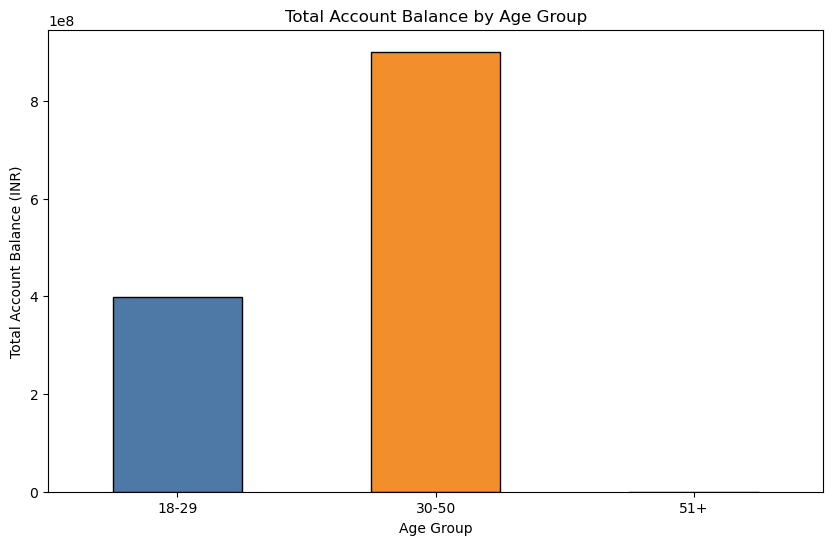

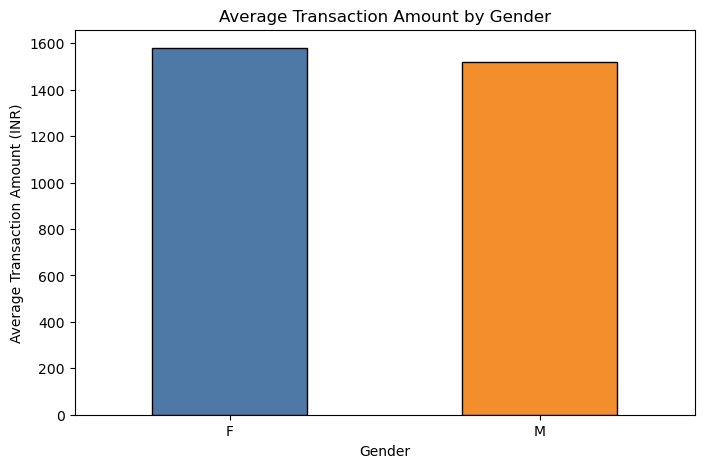

CustGender
F    1579.045780
M    1519.665532
Name: TransactionAmount (INR), dtype: float64

<Figure size 800x500 with 0 Axes>

In [22]:
import pandas as pd
file_path = '/home/ubuntu/bank.csv'  
data = pd.read_csv(file_path)

#Total Account Balance by Age Groups
current_year = 2016  
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], format='%d/%m/%y', errors='coerce')
data['Age'] = current_year - data['CustomerDOB'].dt.year
data = data.dropna(subset=['CustomerDOB'])
bins = [18, 29, 50, 100]
labels = ['18-29', '30-50', '51+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)
age_group_balance = data.groupby('AgeGroup')['CustAccountBalance'].sum()
plt.figure(figsize=(10, 6))
age_group_balance.plot(kind='bar', color=['#4e79a7', '#f28e2b', '#59a14f'], edgecolor='black')
plt.title('Total Account Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Account Balance (INR)')
plt.xticks(rotation=0)
plt.show()

#Average Transaction Amount by Gender
avg_transaction_by_gender = data.groupby('CustGender')['TransactionAmount (INR)'].mean()
plt.figure(figsize=(8, 5))
avg_transaction_by_gender.plot(kind='bar', color=['#4e79a7', '#f28e2b'], edgecolor='black')
plt.title('Average Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount (INR)')
plt.xticks(rotation=0)
plt.show()

#Average Transaction Amount by Gender
avg_transaction_by_gender = data.groupby('CustGender')['TransactionAmount (INR)'].mean()
plt.figure(figsize=(8, 5))
avg_transaction_by_gender

### Findings:
We can observe in both the view as well as the graphs, the [30-50] age group tends to have highest account balance when compared to the two other age groups we classified our data into. We are also observing a trend of higher average transaction amount made by women.

### **Question-2**
#### **What are the total account balances and the number of customers in each location, and which locations have the highest total account balances?**

**This query will be providing us several valuable insights into customer distribution and financial behavior across different locations. These insights can help businesses optimize operations, marketing, and resource allocation based on geographic trends.**

**1. Perfomance accross different locations:**

 - Comparing performance across locations helps evaluate the effectiveness of regional strategies and identify locations that exceed or fall short of expectations. Locations with low 'TotalAccountBalance' and low 'CustomerCount' could be potential opportunities for growth.

**2. Potential market expansion:**
  
 - Locations with modest account balances but high customer counts might indicate underserved areas where customers need better products or services. Marketing campaigns or tailored offerings might help attract customers in these regions.


In [135]:
%%sql
SELECT 
    location_key,
    SUM(custaccountbalance) AS TotalAccountBalance,
    COUNT(transactionid) AS CustomerCount
FROM 
    banktransactions
GROUP BY 
    location_key
ORDER BY 
    TotalAccountBalance DESC;


Running query in 'postgresql://postgres@/finalproject'

3725 rows affected.

location_key,totalaccountbalance,customercount
772,1329186969.251360941030,6661
2478,1145282359.465680470515,8228
715,940507919.078215746550,5879
2418,716491719.667464723965,6478
2137,645861022.916431493100,5700
3224,308567702.059107873275,1650
1373,302756202.023286298620,2505
58,244210125.930751022585,2386
3699,176462979.870751022585,1951
3507,170615643.065821574655,1847


**We will be creating our view for LocationAccountSummary**

In [140]:
%%sql
CREATE VIEW LocationAccountSummary AS
SELECT 
    location_key,
    SUM(CustAccountBalance) AS TotalAccountBalance,
    COUNT(transactionid) AS CustomerCount
FROM 
    BankTransactions
GROUP BY 
    location_key
ORDER BY 
    TotalAccountBalance DESC;

Running query in 'postgresql://postgres@/finalproject'

++
||
++
++

In [141]:
%%sql
SELECT * FROM LocationAccountSummary

Running query in 'postgresql://postgres@/finalproject'

3725 rows affected.

location_key,totalaccountbalance,customercount
772,1329186969.251360941030,6661
2478,1145282359.465680470515,8228
715,940507919.078215746550,5879
2418,716491719.667464723965,6478
2137,645861022.916431493100,5700
3224,308567702.059107873275,1650
1373,302756202.023286298620,2505
58,244210125.930751022585,2386
3699,176462979.870751022585,1951
3507,170615643.065821574655,1847


**We will then be importing all the necessary libraries to create visualizations for the total account balances and the number of customers in each location, and locations having the highest total account balances. We will proceed with this by constructing a bar chart to show total ccount balances by location, another bar chart to show the number of customers in each location and a combined chart for both metrics to identify the locations with the highest balances and customer counts.**

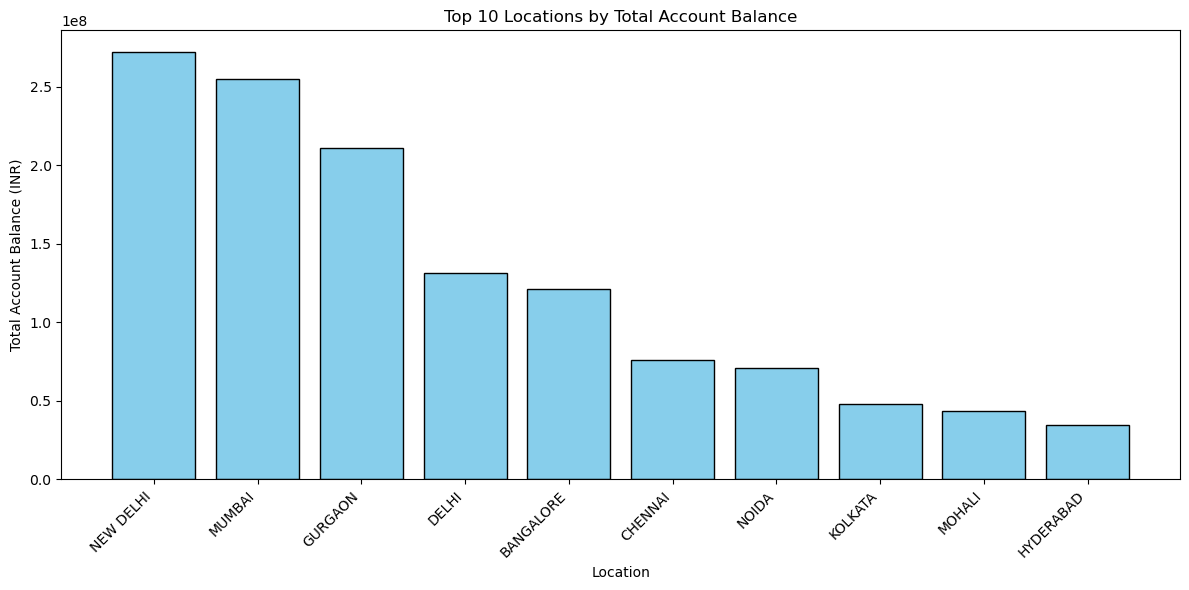

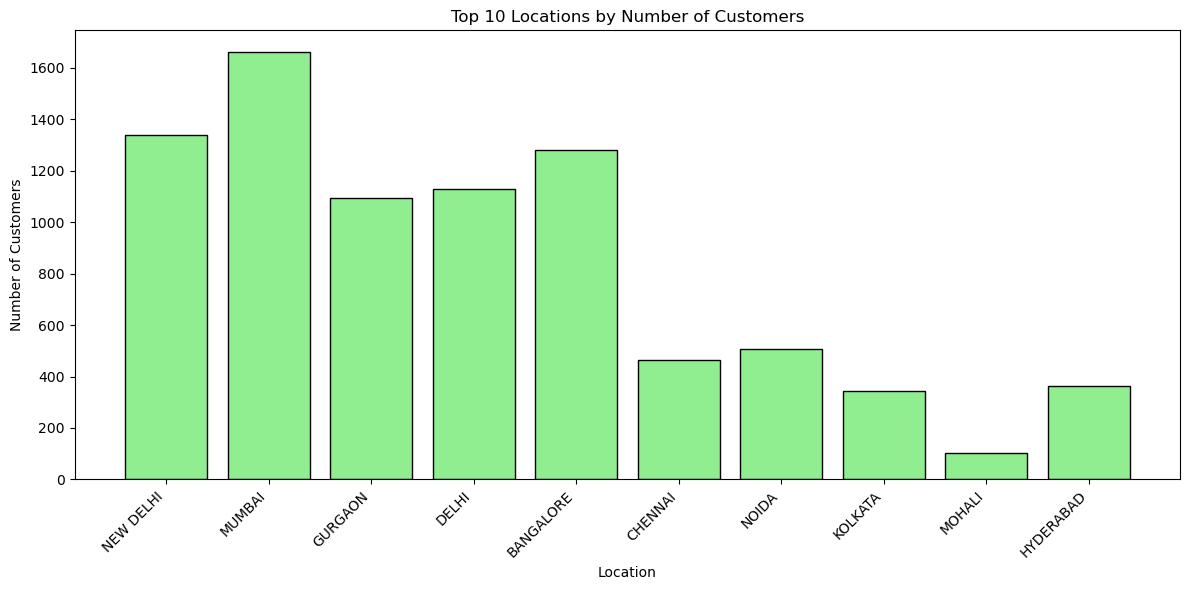

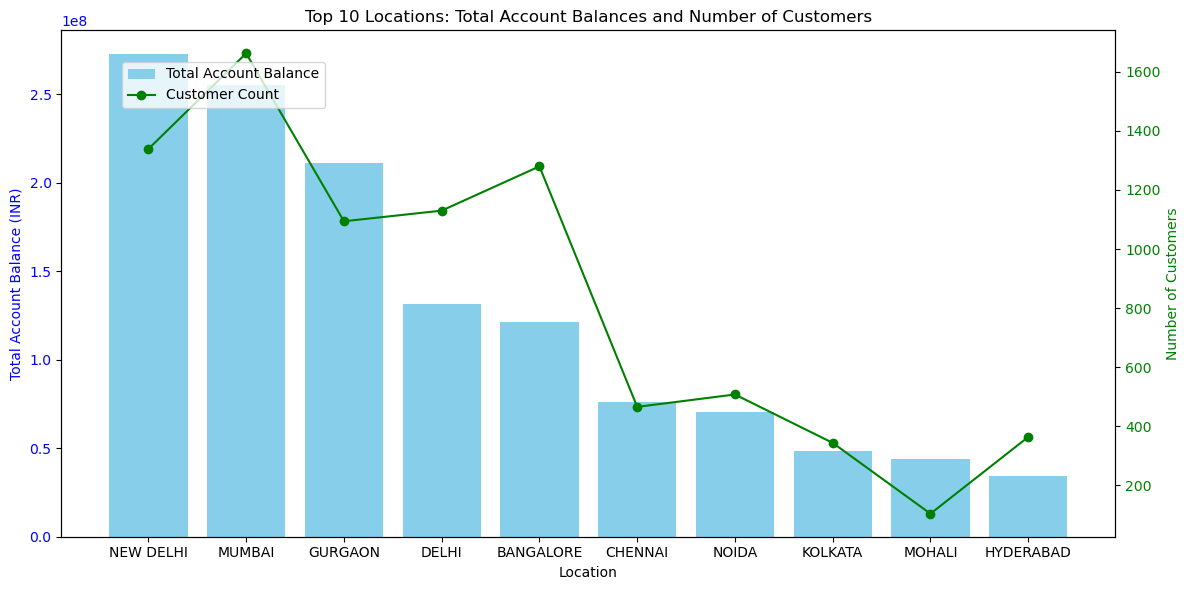

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/home/ubuntu/bank.csv'  
data = pd.read_csv(file_path)

location_summary = data.groupby('CustLocation').agg(
    TotalAccountBalance=('CustAccountBalance', 'sum'),
    CustomerCount=('CustomerID', 'count')
).reset_index()

top_locations = location_summary.nlargest(10, 'TotalAccountBalance')
top_locations = location_summary.nlargest(10, 'TotalAccountBalance')

#Top 10 locations by total account balance
plt.figure(figsize=(12, 6))
plt.bar(top_locations['CustLocation'], top_locations['TotalAccountBalance'], 
        color='skyblue', edgecolor='black')
plt.title('Top 10 Locations by Total Account Balance')
plt.xlabel('Location')
plt.ylabel('Total Account Balance (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Top 10 locations by number of customers
plt.figure(figsize=(12, 6))
plt.bar(top_locations['CustLocation'], top_locations['CustomerCount'], 
        color='lightgreen', edgecolor='black')
plt.title('Top 10 Locations by Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Combined Visualization
top_10_locations = location_summary.nlargest(10, 'TotalAccountBalance')
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(top_10_locations['CustLocation'], top_10_locations['TotalAccountBalance'], 
        color='skyblue', label='Total Account Balance')
ax1.set_xlabel('Location')
ax1.set_ylabel('Total Account Balance (INR)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(top_10_locations['CustLocation'], top_10_locations['CustomerCount'], 
         color='green', marker='o', label='Customer Count')
ax2.set_ylabel('Number of Customers', color='green')
ax2.tick_params(axis='y', labelcolor='green')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Top 10 Locations: Total Account Balances and Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Findings:**
For the graph displaying the Top 10 locations by Total Account Balance, we can observe New Delhi and Mumbai have the highest total account balances, contributing significantly to the overall total.
Cities such as Gurgaon, Delhi, and Bangalore also have notable total account balances but are slightly lower than the top two. Noida, Kolkata, Mohali, and Hyderabad have comparatively lower total balances.

For the graph displaying the Top 10 Location by the number of customers, we can observe Mumbai has the highest number of customers, followed closely by New Delhi. Bangalore, Gurgaon, and Delhi also have a significant customer base. And cities such as Noida, Kolkata, Mohali, and Hyderabad have fewer customers, aligning with their lower account balances.

For the graph displaying the combined visualization for Total Account Balances and Number of customers, we can see capital city New Delhi has the highest total account balance despite having fewer customers when compared to Mumbai. This indicates that customers in New Delhi may hold higher average account balances. However, Mumbai has both a high total account balance and the highest number of customers, reflecting a strong customer base contributing significantly to total balances.
And cities such as Gurgaon, Delhi, and Bangalore exhibit a balance between total account balances and customer counts. Kolkata, Mohali, and Hyderabad have lower total balances and fewer customers, showing underperformance compared to the top locations.

### **Question-3**
#### **What are the total transaction amounts and the number of transactions for each hour of the day, and during which hours do customers make the highest total transactions?**

**This query provides a detailed understanding of hourly transaction trends, enabling businesses to optimize their operations and customer engagement strategies effectively.**

**1. Trend Analysis:**

 - Different bank locations can monitor how transaction behaviors change over time, particularly for specific hours of the day, allowing them to adapt to evolving customer habits.

**2. System Load and Infrastructure Planning:**

 - By understanding when transactions peak, businesses can ensure their IT systems are optimized to handle increased loads during these hours.

**3. System Load and Infrastructure Planning:**

 - By understanding when transactions peak, businesses can ensure their IT systems are optimized to handle increased loads during these hours.**

In [152]:
%%sql
SELECT 
    EXTRACT (HOUR FROM customerdob) AS transactions_key,
    COUNT(*) AS TransactionCount
FROM 
    banktransactions
GROUP BY 
    TransactionHour
ORDER BY 
    TransactionHour;

Running query in 'postgresql://postgres@/finalproject'

RuntimeError: (psycopg2.errors.UndefinedColumn) column "transactionhour" does not exist
LINE 9:     TransactionHour;
            ^

[SQL: SELECT
    EXTRACT (HOUR FROM customerdob) AS transactions_key,
    COUNT(*) AS TransactionCount
FROM
    banktransactions
GROUP BY
    TransactionHour
ORDER BY
    TransactionHour;]
(Background on this error at: https://sqlalche.me/e/20/f405)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [148]:
%%sql
SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = 'banktransactions';


Running query in 'postgresql://postgres@/finalproject'

9 rows affected.

column_name,data_type
transactionid,character varying
customerdob,date
custaccountbalance,numeric
transactionamount,numeric
customer_key,integer
gender_key,integer
location_key,integer
transactions_key,integer
time_key,integer


**We will create and display a view for the above query**

In [5]:
%%sql 
CREATE VIEW HourlyTransactionSummary AS
SELECT 
    DATEPART(HOUR, TransactionTime) AS TransactionHour,
    SUM(TransactionAmount) AS TotalTransactionAmount,
    COUNT(TransactionID) AS TransactionCount
FROM 
    Transactions
GROUP BY 
    DATEPART(HOUR, TransactionTime)
ORDER BY 
    TotalTransactionAmount DESC;

UsageError: Cell magic `%%sql` not found.


In [17]:
%%sql
SELECT * FROM HourlyTransactionSummary;

UsageError: Cell magic `%%sql` not found.


**We will be creating visual aids**

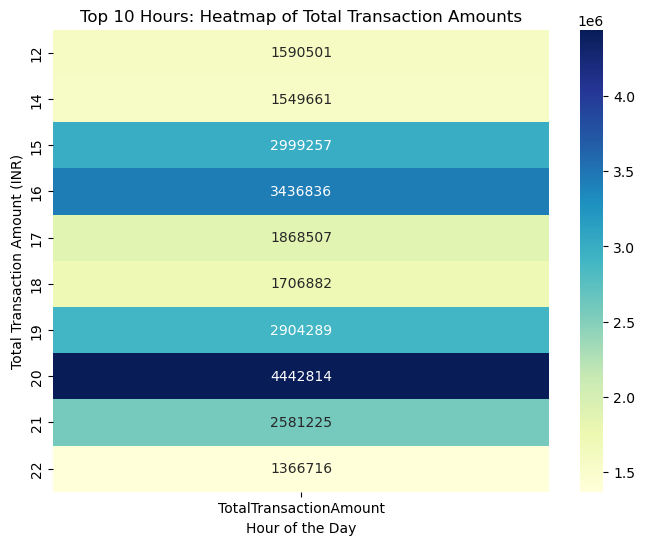

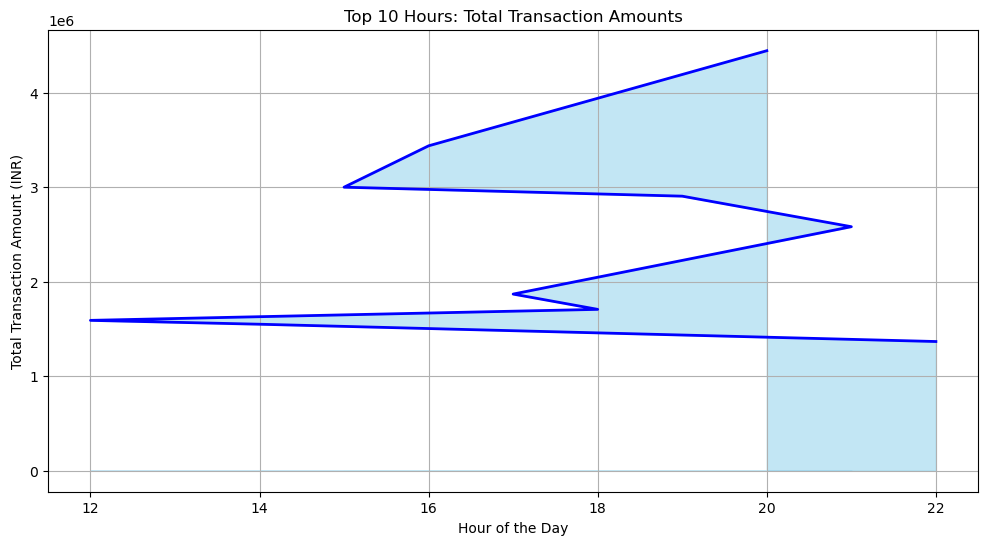

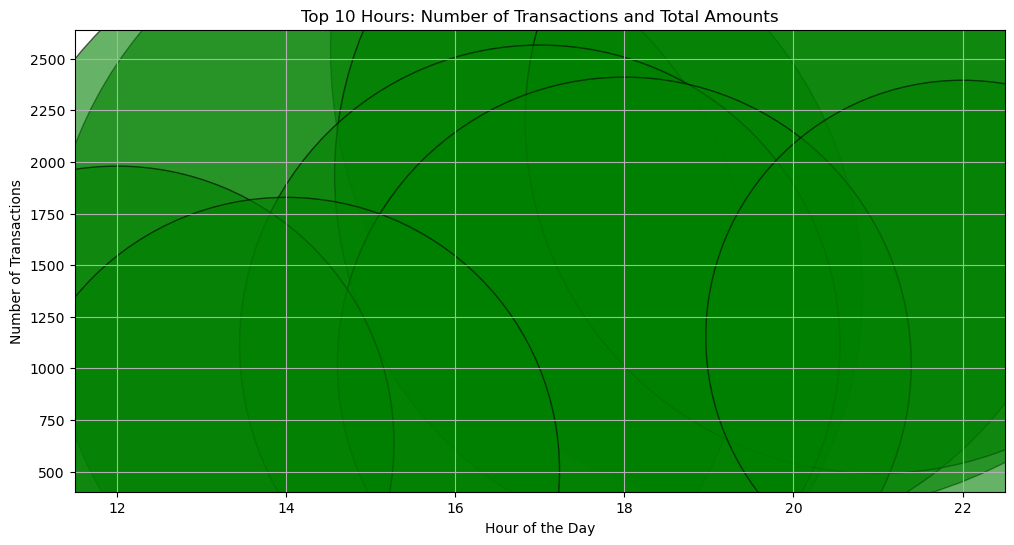

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/home/ubuntu/bank.csv'  
data = pd.read_csv(file_path)

data['TransactionTime'] = pd.to_datetime(data['TransactionTime'], format='%H%M%S', errors='coerce')
data['Hour'] = data['TransactionTime'].dt.hour
hourly_summary = data.groupby('Hour').agg(
    TotalTransactionAmount=('TransactionAmount (INR)', 'sum'),
    TransactionCount=('TransactionID', 'count')
).reset_index()
top_10_hours = hourly_summary.nlargest(10, 'TotalTransactionAmount')

#Heatmap for Top 10 Hours
plt.figure(figsize=(8, 6))
sns.heatmap(top_10_hours.pivot_table(values='TotalTransactionAmount', index='Hour'), 
            annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Top 10 Hours: Heatmap of Total Transaction Amounts')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Transaction Amount (INR)')
plt.show()

#Area Chart for Top 10 Hours
plt.figure(figsize=(12, 6))
plt.fill_between(top_10_hours['Hour'], top_10_hours['TotalTransactionAmount'], color='skyblue', alpha=0.5)
plt.plot(top_10_hours['Hour'], top_10_hours['TotalTransactionAmount'], color='blue', linewidth=2)
plt.title('Top 10 Hours: Total Transaction Amounts')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Transaction Amount (INR)')
plt.grid()
plt.show()

# Visualization 3: Scatter Plot for Top 10 Hours
plt.figure(figsize=(12, 6))
plt.scatter(top_10_hours['Hour'], top_10_hours['TransactionCount'], 
            s=top_10_hours['TotalTransactionAmount'] / 10,  # Bubble size scaled
            color='green', alpha=0.6, edgecolor='black')
plt.title('Top 10 Hours: Number of Transactions and Total Amounts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

### **Findings:**

In the heatmap and area chart, we can observe hat certain hours (approximately around 15:00, 16:00, 20:00, and 21:00 IST) record the highest total transaction amounts. And at 21:00 IST, we can see the highest total transaction amount of approximately 4.44 million INR. Transaction activity is concentrated in the late afternoon and evening hours. These peak hours are likely when customers engage in significant financial activities, such as bill payments, purchases, or transfers.

In the scatter plot, we can find that it shows the relationship between hours of the day and the number of transactions. We can see 21:00 IST has both high transaction amounts and a relatively high number of transactions, making it a peak hour for transactions. The concentration of transactions during 15:00–16:00 and 20:00–21:00 IST indicates regular patterns of customer behavior during these periods.

The heatmap visually identifies the top 10 hours by intensity, with darker shades indicating higher transaction amounts. Transactions are predominantly higher in the afternoon to evening, with a gradual build-up from 12:00 PM to late evening

## **Conclusion:**

1. Key Insights:

&#8594; Transactions by the Hour:
 - Our analysis revealed that transactions are not evenly distributed throughout the day. We observed that the afternoon hours of 15:00–16:00 and 20:00–21:00 in the evenings, peak hours for both **total transaction amounts** and the **number of transactions** were observed.

&#8594; Account Balances and Customer Segmentation by Gender & Age:
 - Customers in the 30-50 age group contribute the highest total account balances, indicating their financial stability and value to the bank. We've also observed Female customers showed slightly higher average transaction amounts compared to male customers, suggesting targeted opportunities for gender-specific financial products.

&#8594; Location-specific Analysis:
 - We observed that cities such as New Delhi, Mumbai, and Gurgaon, contribute the largest total account balances and are predicted to be high-performing locations that are key areas of focus for customer retention and growth strategies.

2. Business Insights:

&#8594; Targeted Marketing and Advertising:
 - Premium financial products and services can be marketed to clients in the 30–50 age groups and high-value areas (like Mumbai and New Delhi). Launching campaigns specifically designed for female consumers can promote increased interaction and expansion.

&#8594; Optimizing Operations:
 - In order to effectively handle increased transaction volumes, resources like infrastructure, support, or server capacity should be given priority during peak hours (15:00–16:00 and 20:00–21:00).

&#8594; Prospects for Future Expansion:
 - The age group of 18-29 is observed to have lower account balances but has potential for future growth. The banking institution should encourage savings, educational or business loans, and investment plans for this segment to improve their financial contributions over time.


**In our analysis, we have successfully analyzed customer transaction behaviors, account balances, and location- and demographic-based trends. The insights provided can assist banks in:**
     
**1. Boosting customer interaction.  
2. Distributing resources effectively and  
3. Creating specific financial products and marketing strategies to optimize profitability.**